## 1. Imports

In [1]:
#Importamos librerías
import sys
import os 

import numpy as np # Arrays
import pandas as pd # Series and Dataframes

import matplotlib.pyplot as plt 
import seaborn as sns # Advanced Plotting 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
# from google.colab import files #para importar desde google
# from google.colab import drive

pd.options.display.max_rows = 100
plt.style.use('ggplot') # Beautify Plots 

In [2]:
#A nivel de modelos
from sklearn import model_selection
import xgboost as xgb #este es para hacer decision trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics # model evaluation metrics

In [3]:
#Estas funciones son para hacer transformaciones
from scipy import stats
from datetime import datetime

In [4]:
#librería para hacer números random
import random

In [5]:
#json se utiliza para bd de nosql, pero es parecido a los diccionarios de phyton. normalmente tiene esta forma {'ggg`: 'zzzz'}
#Cuando se importa de googlemaps, eso está guardado en un json

import random
import json
from pandas import json_normalize

In [6]:
#para poder ver los datos tenemos que montar el drive
#drive.mount('/content/gdrive')

In [7]:
#Conectar el drive donde tenemos el csv que queremos leer

In [8]:
#df=pd.read_csv(r"/content/gdrive/MyDrive/a. Nuclio/entregas/easy_money/df_easy.csv",sep=",")

Para fines de ser mas eficientes con el df en colab, se selecciona solo una parte del df para trabajar con él. 

In [9]:
#df_completo=pd.read_csv(r"/content/gdrive/MyDrive/a. Nuclio/entregas/easy_money/df_easy.csv",sep=",")

In [10]:
#df = df_completo.sample(n=10000, random_state=42)

Para hacer la modelización se carga el df completo, desmarcando las sample

In [11]:
df=pd.read_csv(r"C:\Users\Usuario\OneDrive\Workplace\Portfolio_Projects\TFM_DSC_Easy_Money\data\sample_easyMoney_220523.csv",sep=",")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915793 entries, 0 to 915792
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          915793 non-null  int64  
 1   pk_sale             915793 non-null  int64  
 2   pk_cid              915793 non-null  int64  
 3   month_sale          915793 non-null  object 
 4   pk_product_ID       915793 non-null  int64  
 5   net_margin          915793 non-null  float64
 6   product_desc        915793 non-null  object 
 7   family_product      915793 non-null  object 
 8   entry_date          915793 non-null  object 
 9   entry_channel       915793 non-null  object 
 10  active_customer     915793 non-null  float64
 11  segment             915793 non-null  object 
 12  country_id          915793 non-null  object 
 13  region_code         915793 non-null  float64
 14  gender              915793 non-null  object 
 15  age                 915793 non-nul

In [13]:
#analizamos los tipos de datos que tenemos, para que cada variable tenga el tipo de dato adecuado

In [14]:
#se cambia el formato de las variables de fecha a formato de fecha

In [15]:
df['month_sale'] = pd.to_datetime(df['month_sale'])

In [16]:
df['entry_date'] = pd.to_datetime(df['entry_date'])

In [17]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915793 entries, 0 to 915792
Columns: 37 entries, Unnamed: 0 to gender_num
dtypes: datetime64[ns](2), float64(7), int64(20), object(8)
memory usage: 258.5+ MB


In [18]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
pk_sale,6666,6666,6666,130018,130018
pk_cid,33620,33620,33620,33620,33620
month_sale,2018-05-01 00:00:00,2018-05-01 00:00:00,2018-05-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00
pk_product_ID,2335,2335,2335,4657,4657
net_margin,952.9,952.9,952.9,71.6,71.6
product_desc,short_term_deposit,short_term_deposit,short_term_deposit,em_acount,em_acount
family_product,investment,investment,investment,account,account
entry_date,2018-04-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00
entry_channel,KHK,KHK,KHK,KHK,KHK


In [19]:
#vemos si hay nulos (aunque ya sabemos que no porque el csv esta limpio de nulos)

In [20]:
df.isnull().sum()

Unnamed: 0            0
pk_sale               0
pk_cid                0
month_sale            0
pk_product_ID         0
net_margin            0
product_desc          0
family_product        0
entry_date            0
entry_channel         0
active_customer       0
segment               0
country_id            0
region_code           0
gender                0
age                   0
deceased              0
salary                0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
entry_month           0
cliente_antiguo       0
net_margin_log        0
gender_num            0
dtype: int64

In [21]:
#vemos si hay duplicados (aunque ya sabemos que no porque el csv esta limpio de duplicados)

In [22]:
df[df.duplicated(keep=False)]

,Unnamed: 0,pk_sale,pk_cid,month_sale,pk_product_ID,net_margin,product_desc,family_product,entry_date,entry_channel,...,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,entry_month,cliente_antiguo,net_margin_log,gender_num


In [23]:
#para analizar el margen por tipo de segmento de cliente:
#len nos dice la cantidad de clientes en ese segmento
#sum es la suma total del margen en ese segmento, para todo el intervalo de tiempo del dataset
#mean es la media del margen por tipo de segmento de cliente

df.pivot_table(index='segment',values='net_margin',aggfunc=[len,np.sum,np.mean])

,len,sum,mean
,net_margin,net_margin,net_margin
segment,,,
01 - TOP,49436,32149357.9,650.322799
02 - PARTICULARES,450598,379993076.7,843.308396
03 - UNIVERSITARIO,285923,215470062.0,753.594716
04 - OTRO,129836,43453237.7,334.677884


In [24]:
#lo ordenamos un poco mejor:
df.pivot_table(index='segment',values='net_margin',aggfunc=[len,np.sum,np.mean]).sort_values(by=[('mean','net_margin')],ascending=False)

,len,sum,mean
,net_margin,net_margin,net_margin
segment,,,
02 - PARTICULARES,450598,379993076.7,843.308396
03 - UNIVERSITARIO,285923,215470062.0,753.594716
01 - TOP,49436,32149357.9,650.322799
04 - OTRO,129836,43453237.7,334.677884


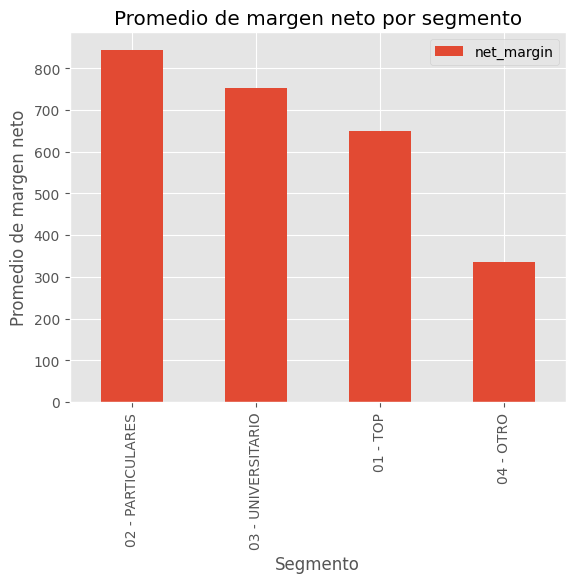

In [25]:
df.pivot_table(index='segment',values='net_margin',aggfunc=[len,np.sum,np.mean]).sort_values(by=[('mean','net_margin')],ascending=False)['mean'].plot(kind='bar')
plt.title('Promedio de margen neto por segmento')
plt.xlabel('Segmento')
plt.ylabel('Promedio de margen neto')
plt.show()

In [26]:
#para analizar el margen por familia de productos:
df.pivot_table(index='family_product',values='net_margin',aggfunc=[len,np.sum,np.mean]).sort_values(by=[('mean','net_margin')],ascending=False)

,len,sum,mean
,net_margin,net_margin,net_margin
family_product,,,
pension_plan,92029,549967942.7,5976.028672
loan,179,411594.8,2299.412291
investment,45584,68069652.5,1493.279495
account,594650,41613463.5,69.979759
payment_card,183351,11003080.8,60.011021


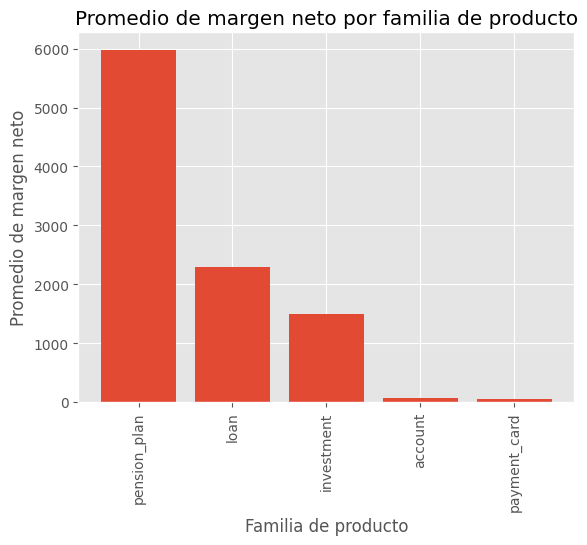

In [27]:
# Crea la tabla dinámica y ordena los valores por el promedio de net_margin de mayor a menor
tabla = df.pivot_table(index='family_product', values='net_margin', aggfunc=[len,np.sum,np.mean]).sort_values(by=[('mean','net_margin')], ascending=False)

# Extrae la columna de la media y grafica un gráfico de barras
plt.bar(tabla.index, tabla[('mean', 'net_margin')])

# Añade títulos y etiquetas a los ejes
plt.title('Promedio de margen neto por familia de producto')
plt.xlabel('Familia de producto')
plt.ylabel('Promedio de margen neto')

# Gira las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()

In [28]:
#Podemos decir que:
#El plan de pensiones es el que mayor rentabilidad tiene, seguido de los préstamos
#El segmento de cliente con mayor margen es el de particulares, seguido del de universitarios

In [29]:
#Analizamos la familia de productos que se contrata por cada segmento de cliente
df.groupby('segment')['family_product'].value_counts()

segment             family_product
01 - TOP            account            27852
                    investment         13791
                    payment_card        6227
                    pension_plan        1563
                    loan                   3
02 - PARTICULARES   account           264047
                    payment_card      107492
                    pension_plan       52992
                    investment         25954
                    loan                 113
03 - UNIVERSITARIO  account           194362
                    payment_card       56515
                    pension_plan       32415
                    investment          2570
                    loan                  61
04 - OTRO           account           108389
                    payment_card       13117
                    pension_plan        5059
                    investment          3269
                    loan                   2
Name: count, dtype: int64

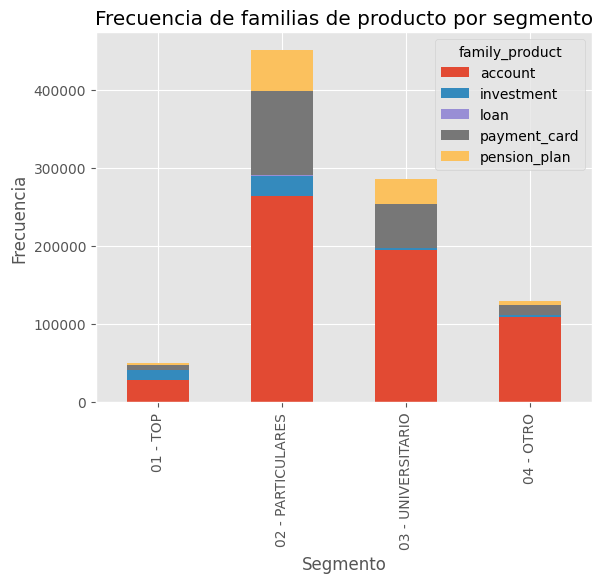

In [30]:
# Crea una tabla de frecuencia utilizando la función "value_counts()"
tabla3 = df.groupby('segment')['family_product'].value_counts()

# Convierte la tabla en un DataFrame
df_tabla = tabla3.unstack(level=1)

# Grafica el DataFrame como un gráfico de barras apilado
df_tabla.plot(kind='bar', stacked=True)

# Añade títulos y etiquetas a los ejes
plt.title('Frecuencia de familias de producto por segmento')
plt.xlabel('Segmento')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

In [31]:
#observamos que lo más tipico que contratan los clientes son cuentas y prodcutos de inversion, pero hemos visto que esos son los productos 
#que pero margen tienen. Habria que impulsar la contratacion de prestamos (loan) y planes de pensiones que es lo que mayor margen parece dar.

In [32]:
#para saber cuantos clientes tenemos en el dataframe, podemos averiguar cuantos pk_cid unicos hay
df['pk_cid'].nunique()

152754

entry_month
2015-01      412
2015-02      394
2015-03      376
2015-04      402
2015-05      567
2015-06      494
2015-07     1186
2015-08     1224
2015-09     1239
2015-10     1762
2015-11     1226
2015-12      723
2016-01      657
2016-02      538
2016-03      479
2016-04      652
2016-05      604
2016-06      571
2016-07     1235
2016-08     1473
2016-09     1482
2016-10     2043
2016-11     1367
2016-12      999
2017-01     1049
2017-02      934
2017-03      968
2017-04      920
2017-05      927
2017-06     1124
2017-07     2008
2017-08     1609
2017-09     2484
2017-10     3068
2017-11     2383
2017-12     2210
2018-01     2254
2018-02     3333
2018-03     2901
2018-04     2650
2018-05     2668
2018-06     2601
2018-07    14743
2018-08    12077
2018-09    18819
2018-10    18342
2018-11     9989
2018-12     4230
2019-01     5015
2019-02     4165
2019-03     3140
2019-04     2506
2019-05     1535
Freq: M, Name: pk_cid, dtype: int64


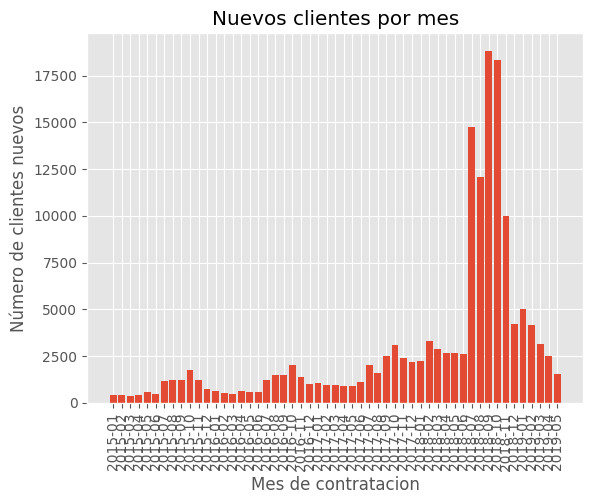

In [33]:
#para saber los nuevos clientes que entran cada mes, de toda la historia del dataset.
df['entry_month'] = df['entry_date'].dt.to_period('M') # crear nueva columna con mes de entrada
new_clients = df.groupby('entry_month')['pk_cid'].nunique() # agrupar por mes de entrada y contar clientes únicos.
print(new_clients)
plt.bar(new_clients.index.astype(str), new_clients.values, width=0.8)

# Añadir etiquetas de eje y título
plt.xlabel('Mes de contratacion')
plt.ylabel('Número de clientes nuevos')
plt.title('Nuevos clientes por mes')
plt.xticks(rotation=90)
plt.show()


In [34]:
df['month_sale'] = df['month_sale'].dt.to_period('M') # crear nueva columna con mes de venta
sales_per_month = df.groupby('month_sale')['pk_sale'].count() # agrupar por mes de venta y contar ventas


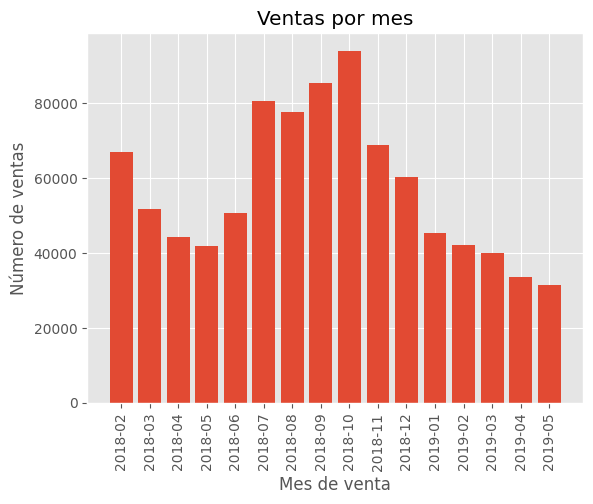

In [35]:
# Crear un histograma de barras para las ventas por mes
sales_per_month = df.groupby('month_sale')['pk_sale'].count()
plt.bar(sales_per_month.index.astype(str), sales_per_month.values, width=0.8)

# Añadir etiquetas de eje y título
plt.xlabel('Mes de venta')
plt.ylabel('Número de ventas')
plt.title('Ventas por mes')
plt.xticks(rotation=90)
plt.show()


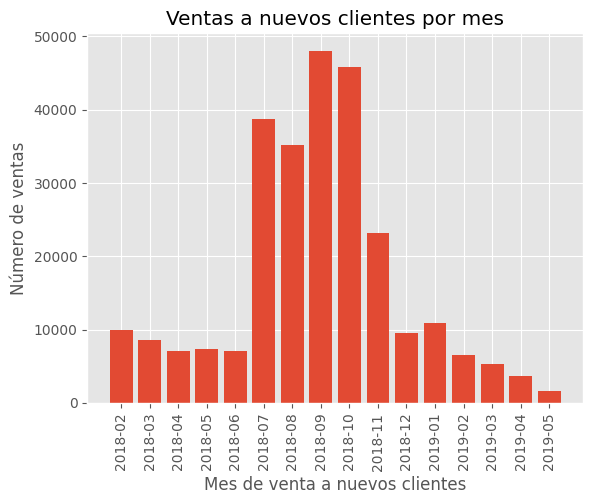

In [36]:
# Crear un histograma de barras para las ventas por mes a clientes nuevos
new_clients_sales_per_month = df[df['month_sale'] == df['entry_month']].groupby('month_sale')['pk_sale'].count() # filtrar ventas a nuevos clientes y contar ventas por mes de venta
plt.bar(new_clients_sales_per_month.index.astype(str), new_clients_sales_per_month.values, width=0.8)

# Añadir etiquetas de eje y título
plt.xlabel('Mes de venta a nuevos clientes')
plt.ylabel('Número de ventas')
plt.title('Ventas a nuevos clientes por mes')
plt.xticks(rotation=90)
plt.show()


<Axes: title={'center': 'Ventas a clientes antiguos por mes'}, xlabel='Mes de venta', ylabel='Número de ventas'>

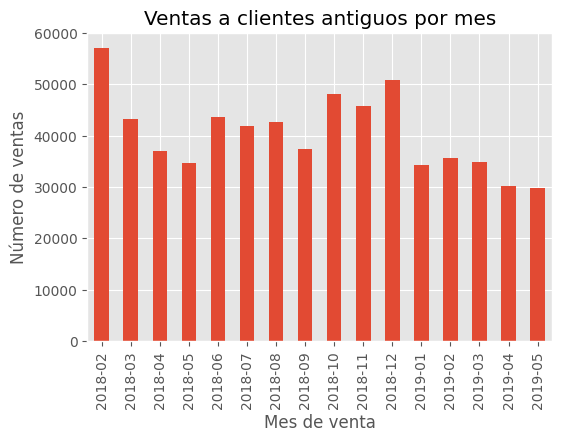

In [37]:
#ventas por mes a clientes antiguos (contratados anteriormente a ese mes)

# agrupar por mes de venta y contar las ventas de clientes que entraron antes de ese mes
sales_clients_ant = df[df['entry_month'] < df['month_sale']].groupby('month_sale').size()

# visualizar en un gráfico de barras
sales_clients_ant.plot(kind='bar', xlabel='Mes de venta', ylabel='Número de ventas', title='Ventas a clientes antiguos por mes', figsize=(6, 4))


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915793 entries, 0 to 915792
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          915793 non-null  int64         
 1   pk_sale             915793 non-null  int64         
 2   pk_cid              915793 non-null  int64         
 3   month_sale          915793 non-null  period[M]     
 4   pk_product_ID       915793 non-null  int64         
 5   net_margin          915793 non-null  float64       
 6   product_desc        915793 non-null  object        
 7   family_product      915793 non-null  object        
 8   entry_date          915793 non-null  datetime64[ns]
 9   entry_channel       915793 non-null  object        
 10  active_customer     915793 non-null  float64       
 11  segment             915793 non-null  object        
 12  country_id          915793 non-null  object        
 13  region_code         915793 no

In [39]:
df_description = df.describe(include = 'all').T

In [40]:
df_description.to_csv('df_description.csv')

In [41]:
files.download('df_description.csv')

NameError: name 'files' is not defined

#NUEVO

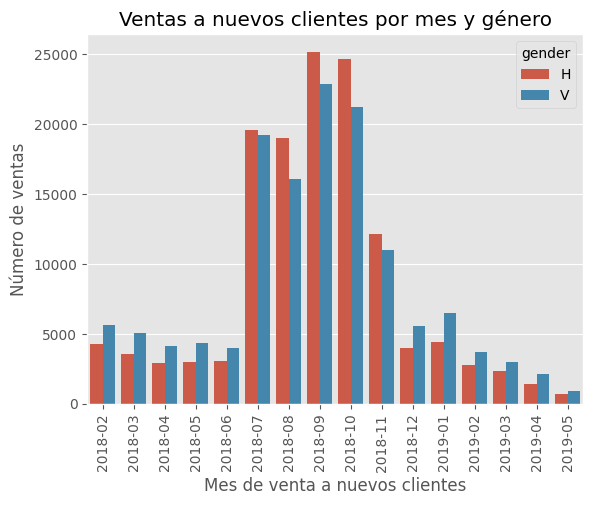

In [ ]:
# Crear un histograma de barras para las ventas por mes a clientes nuevos por género
new_clients_sales_per_month = df[df['month_sale'] == df['entry_month']].groupby(['month_sale', 'gender'])['pk_sale'].count().reset_index()

sns.barplot(x='month_sale', y='pk_sale', hue='gender', data=new_clients_sales_per_month)
plt.title('Ventas a nuevos clientes por mes y género')
plt.xlabel('Mes de venta a nuevos clientes')
plt.ylabel('Número de ventas')
plt.xticks(rotation=90)
plt.show()

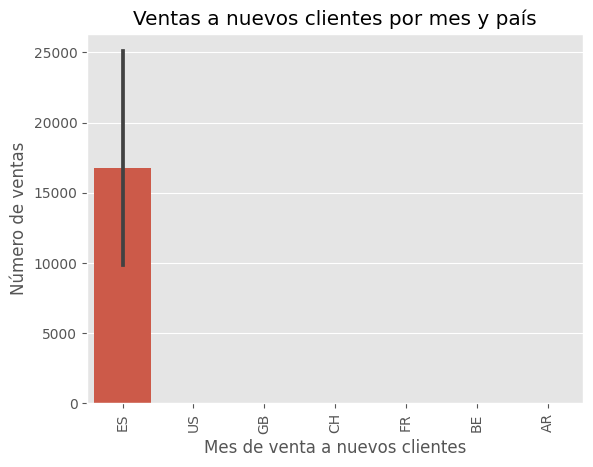

In [ ]:
# Crear un histograma de barras para las ventas por mes a clientes nuevos por país
new_clients_sales_per_month3 = df[df['month_sale'] == df['entry_month']].groupby(['month_sale', 'country_id'])['pk_sale'].count().reset_index()

sns.barplot(x='country_id', y='pk_sale', data=new_clients_sales_per_month3)
plt.title('Ventas a nuevos clientes por mes y país')
plt.xlabel('Mes de venta a nuevos clientes')
plt.ylabel('Número de ventas')
plt.xticks(rotation=90)
plt.show()

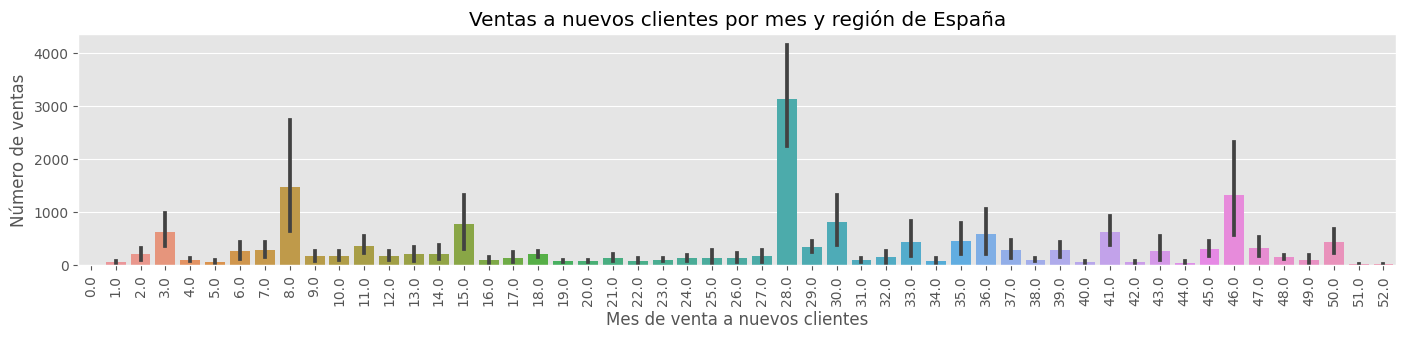

In [ ]:
# Crear un histograma de barras para las ventas por mes a clientes nuevos por región de España
new_clients_sales_per_month4 = df[df['month_sale'] == df['entry_month']].groupby(['month_sale', 'region_code'])['pk_sale'].count().reset_index()

plt.figure(figsize=(17, 3))

sns.barplot(x='region_code', y='pk_sale', data=new_clients_sales_per_month4)
plt.title('Ventas a nuevos clientes por mes y región de España')
plt.xlabel('Mes de venta a nuevos clientes')
plt.ylabel('Número de ventas')
plt.xticks(rotation=90)
plt.show()

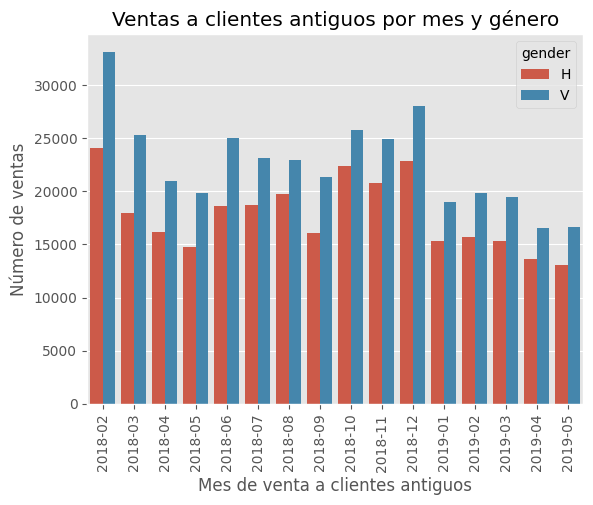

In [ ]:
# agrupar por mes de venta y contar las ventas de clientes antiguos

ant_clients_sales_per_month = df[df['month_sale'] > df['entry_month']].groupby(['month_sale', 'gender'])['pk_sale'].count().reset_index()

sns.barplot(x='month_sale', y='pk_sale', hue='gender', data=ant_clients_sales_per_month)
plt.title('Ventas a clientes antiguos por mes y género')
plt.xlabel('Mes de venta a clientes antiguos')
plt.ylabel('Número de ventas')
plt.xticks(rotation=90)
plt.show()

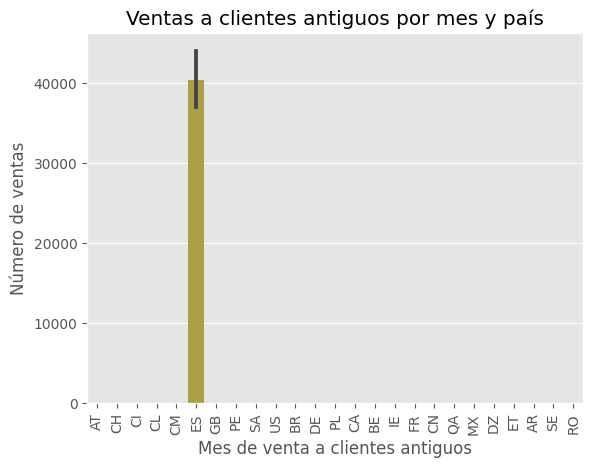

In [ ]:
# Crear un histograma de barras para las ventas por mes a clientes antiguos por país
ant_clients_sales_per_month3 = df[df['month_sale'] > df['entry_month']].groupby(['month_sale', 'country_id'])['pk_sale'].count().reset_index()

sns.barplot(x='country_id', y='pk_sale', data=ant_clients_sales_per_month3)
plt.title('Ventas a clientes antiguos por mes y país')
plt.xlabel('Mes de venta a clientes antiguos')
plt.ylabel('Número de ventas')
plt.xticks(rotation=90)
plt.show()

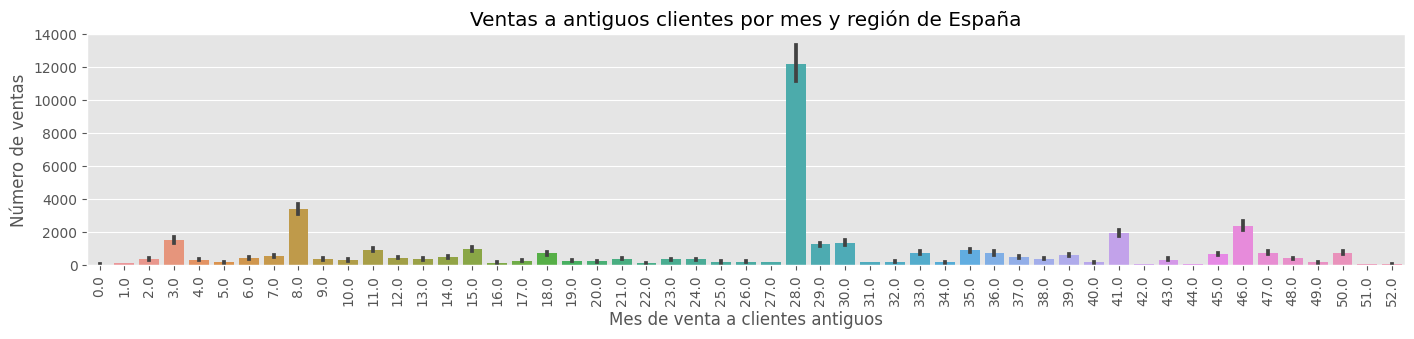

In [ ]:
# Crear un histograma de barras para las ventas por mes a clientes antiguos por región de España
ant_clients_sales_per_month4 = df[df['month_sale'] > df['entry_month']].groupby(['month_sale', 'region_code'])['pk_sale'].count().reset_index()

plt.figure(figsize=(17, 3))

sns.barplot(x='region_code', y='pk_sale', data=ant_clients_sales_per_month4)
plt.title('Ventas a antiguos clientes por mes y región de España')
plt.xlabel('Mes de venta a clientes antiguos')
plt.ylabel('Número de ventas')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df[df['month_sale'] > df['entry_month']]['country_id'].unique()

array(['ES', 'PE', 'GB', 'FR', 'CH', 'CA', 'US', 'PL', 'MX', 'CI', 'CL',
       'BE', 'RO', 'CM', 'SA', 'AR', 'DE', 'QA', 'ET', 'IE', 'AT', 'CN',
       'BR', 'DZ', 'SE'], dtype=object)

In [ ]:
df[df['month_sale'] == df['entry_month']]['country_id'].unique()


array(['ES', 'GB', 'FR', 'AR', 'CH', 'US', 'BE'], dtype=object)

In [ ]:
#value counts de los clientes nuevos para la variable country
df[df['month_sale'] == df['entry_month']]['country_id'].value_counts()

ES    268428
GB        15
FR         6
AR         5
US         3
CH         2
BE         1
Name: country_id, dtype: int64

In [ ]:
#value counts de los clientes antiguos para la variable country

df[df['month_sale'] > df['entry_month']]['country_id'].value_counts()

ES    647014
GB        96
FR        48
CH        46
CI        15
SA        14
DE        14
US        13
CL        12
AR        10
AT         5
CM         5
IE         4
ET         4
BE         4
MX         4
PL         4
QA         3
CA         3
CN         3
DZ         2
BR         2
RO         2
PE         2
SE         2
Name: country_id, dtype: int64

* ANÁLISIS DEL TARGET

In [ ]:
TARGET= 'net_margin'

In [ ]:
df[TARGET].describe()

count    915793.000000
mean        732.770107
std        1916.633977
min          25.000000
25%          61.400000
50%          69.300000
75%          80.200000
max       18466.400000
Name: net_margin, dtype: float64

La distribución está muy a la derecha, el margen de la media está en sólo el 25 porciento final de la distribucion. Tendremos que realizar técnicas para datasets desbalanceados como escalas logarítmicas o eliminar outliers.

<ipython-input-173-b7b2aec8331a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='net_margin', ylabel='Density'>

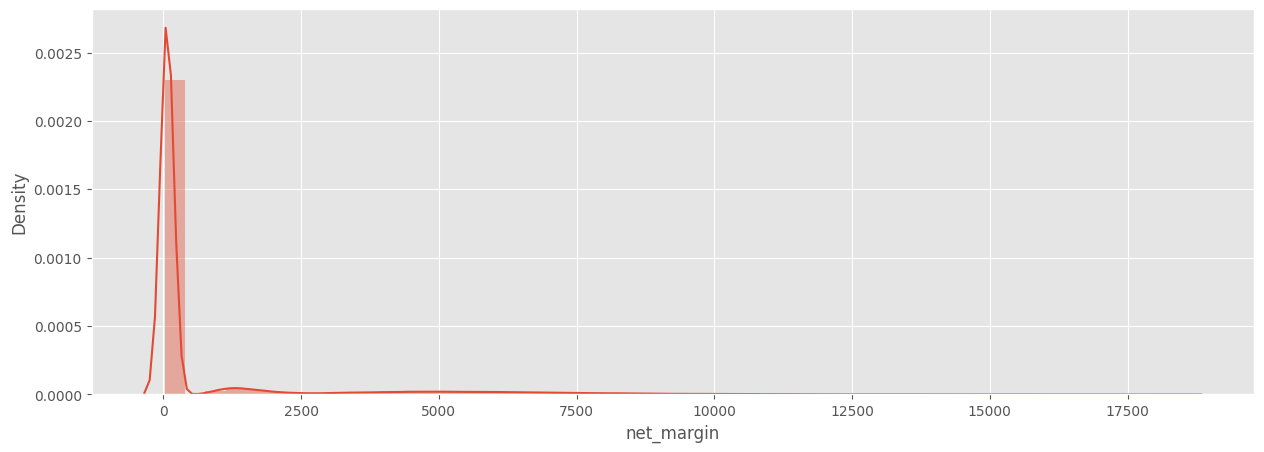

In [ ]:
# Distribución de la variable target al completo
plt.figure(figsize=(15, 5))
sns.distplot(
    df[TARGET])

In [ ]:
#Se hará un análisis de los datos que estén en el 10% a la derecha de la distribución 
q = df[TARGET].quantile(0.9)

# Selecciona las filas donde el valor de "Target" es mayor que el cuantil del 90%
df_filtrado = df[df[TARGET] > q]

minimo = df_filtrado[TARGET].min()
maximo = df_filtrado[TARGET].max()

# Muestra los valores mínimos y máximos
print("Valor mínimo de Target:", minimo)
print("Valor máximo de Target:", maximo)

Valor mínimo de Target: 2499.1
Valor máximo de Target: 18466.4


Aquí puede verse que el 10% de la muestra tiene valores muy superiores a la media de nuestros clientes.

<ipython-input-175-591604a88484>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='net_margin', ylabel='Density'>

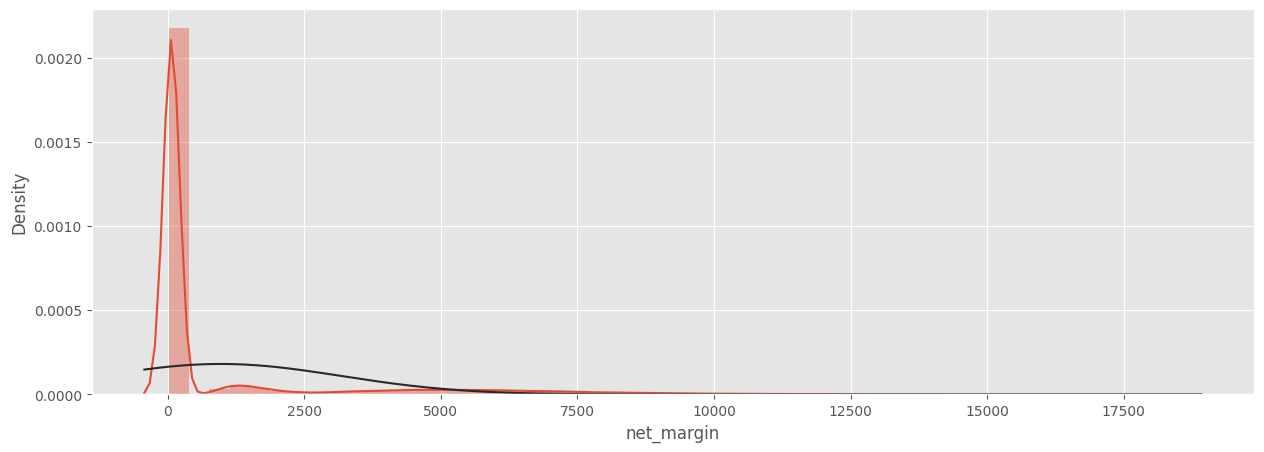

In [ ]:
#Se realizará solo las transformaciones logarítmicas de la distribución de los clientes antiguos que son los que a la
#gerencia le interesan. 

df['cliente_antiguo'] = np.where(df['month_sale'] > df['entry_month'], 1, 0)

plt.figure(figsize=(15, 5))
sns.distplot(
    df[df['cliente_antiguo'] == 1]['net_margin'],
    fit = stats.norm
)




In [ ]:
#hacemos escala logarítmica para nuestro Target
df['net_margin_log'] = df['net_margin'].apply(lambda x: np.log1p(x))

In [ ]:
TARGET_LN= 'net_margin_log'

<ipython-input-178-c8c31feaa91a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='net_margin_log', ylabel='Density'>

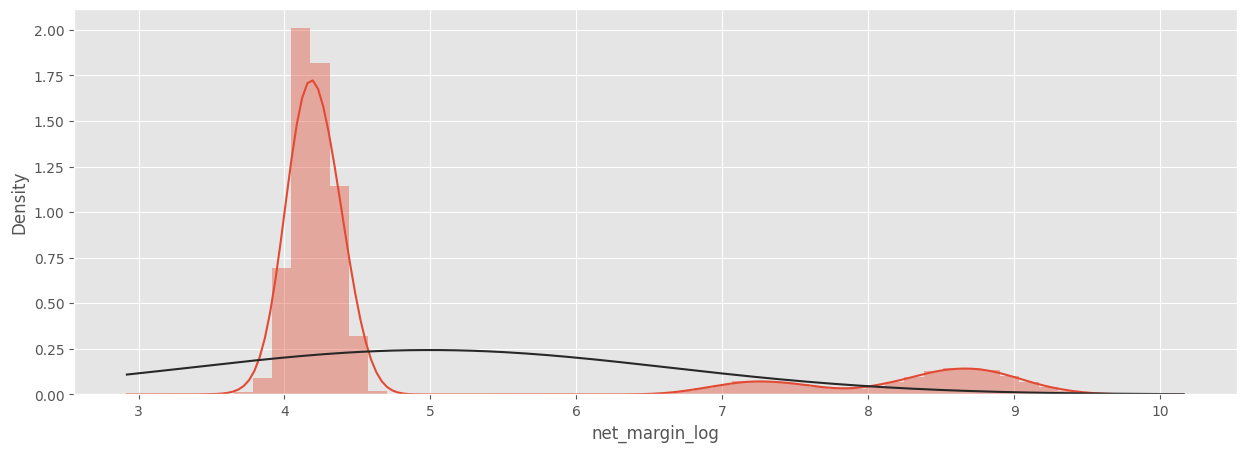

In [ ]:
plt.figure(figsize=(15, 5))
sns.distplot(
    df[df['cliente_antiguo'] == 1][TARGET_LN],
    fit = stats.norm)

COMENTARIOS: 
1) nos muestra los outliers que tenemos hacia la derecha y el resto de la distribución ya ajustada a una distribución normal para los clientes antiguos

# Analisis de variables con el target

In [ ]:
#FUNCIONES PARA ANÁLISIS DE VARIABLES

In [ ]:
#Función para graficar
def plot_cat_values(dataframe, column, target_column):
    plt.figure(figsize=(15,8))
    #en una única grafica de 2x1 en el primer slot
    ax1 = plt.subplot(2,1,1)
    ## Graficamos el conteo de cada uno de los valores
    ax1 = sns.countplot(
        data = dataframe,
        x= column,
        order = list(dataframe[column].unique())
    )
    plt.xticks(rotation=45)

    ax2 = plt.subplot(2,1,2) # share ax1 para que me pinte el axis en el mismo orden
    ## Graficamos la distribución del target sólo para aquellos casos con target > 0 (para que no se chafe el BP) 
    ax2 = sns.boxenplot(
        data = dataframe[dataframe[target_column] > 0], 
        x = column,
        y = target_column,
        order = list(dataframe[column].unique())
    )
    
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
#Función para variables categóricas

def explore_cat_values(dataframe, column, target_column):
    _results_df = dataframe[dataframe['cliente_antiguo'] == 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean])
    _results_df.columns = ['serv_contratados', 'media_margen_neto_ln']
    _results_df['n_rows'] = dataframe[column].value_counts(dropna=False)
    _results_df['pct_rows'] = dataframe[column].value_counts(normalize=True, dropna=False)
    _results_df['pct_serv_contratados'] = _results_df['serv_contratados'] / _results_df['n_rows']
    _results_df = _results_df[['n_rows', 'pct_rows', 'serv_contratados', 'pct_serv_contratados', 'media_margen_neto_ln']].sort_values(by=('n_rows'), ascending=False)
    return _results_df



Variable: product_desc

In [ ]:
df['product_desc'].describe()

count        915793
unique           13
top       em_acount
freq         366261
Name: product_desc, dtype: object

COMENTARIO: 
* La variable no tiene nulos.
* Tiene 13 etiquetas distintas
* La top es em_acount en donde 4 de cada 10 clientes tienen contratado este producto.
* Se hará un one hot encoding. 

In [ ]:
df['product_desc'].value_counts(dropna=False)

em_acount             366261
debit_card            158414
pension_plan           92029
payroll                89167
payroll_account        85464
emc_account            53758
credit_card            24937
short_term_deposit     19671
long_term_deposit      16882
securities              5199
funds                   3832
loans                    131
mortgage                  48
Name: product_desc, dtype: int64

In [ ]:
df['product_desc'].value_counts(normalize=True, dropna=False)

em_acount             0.399939
debit_card            0.172980
pension_plan          0.100491
payroll               0.097366
payroll_account       0.093322
emc_account           0.058701
credit_card           0.027230
short_term_deposit    0.021480
long_term_deposit     0.018434
securities            0.005677
funds                 0.004184
loans                 0.000143
mortgage              0.000052
Name: product_desc, dtype: float64

In [ ]:
#Se realiza el análisis sólo para los clientes antiguos
df[df['cliente_antiguo'] == 1].pivot_table(index='product_desc', values=TARGET_LN, aggfunc=[len, np.mean])

,len,mean
,net_margin_log,net_margin_log
product_desc,,
credit_card,24797,4.108567
debit_card,155388,4.107475
em_acount,116000,4.252537
emc_account,53382,4.253224
funds,3786,7.264884
loans,127,7.673937
long_term_deposit,15465,7.270473
mortgage,48,7.711975


In [ ]:
_results_df = df[df['cliente_antiguo'] == 1].pivot_table(index='product_desc', values=TARGET_LN, aggfunc=[len, np.mean]).sort_values(by=('len', TARGET_LN), ascending=False)

In [ ]:
_results_df.columns = ['serv_contratados', 'margen_neto_ln']

In [ ]:
_results_df.head()

,serv_contratados,margen_neto_ln
product_desc,,
debit_card,155388,4.107475
em_acount,116000,4.252537
pension_plan,89874,8.628815
payroll,87063,4.251465
payroll_account,83153,4.251639


In [ ]:
_results_df['n_rows'] = df['product_desc'].value_counts(dropna=False)

In [ ]:
_results_df.head()

,serv_contratados,margen_neto_ln,n_rows
product_desc,,,
debit_card,155388,4.107475,158414
em_acount,116000,4.252537,366261
pension_plan,89874,8.628815,92029
payroll,87063,4.251465,89167
payroll_account,83153,4.251639,85464


In [ ]:
_results_df['pct_rows'] = df['product_desc'].value_counts(normalize=True, dropna=False)

In [ ]:
_results_df.head()

,serv_contratados,margen_neto_ln,n_rows,pct_rows
product_desc,,,,
debit_card,155388,4.107475,158414,0.172980
em_acount,116000,4.252537,366261,0.399939
pension_plan,89874,8.628815,92029,0.100491
payroll,87063,4.251465,89167,0.097366
payroll_account,83153,4.251639,85464,0.093322


In [ ]:
_results_df['pct_serv_contratados'] = _results_df['serv_contratados'] / _results_df['n_rows']

In [ ]:
_results_df.head()

,serv_contratados,margen_neto_ln,n_rows,pct_rows,pct_serv_contratados
product_desc,,,,,
debit_card,155388,4.107475,158414,0.172980,0.980898
em_acount,116000,4.252537,366261,0.399939,0.316714
pension_plan,89874,8.628815,92029,0.100491,0.976583
payroll,87063,4.251465,89167,0.097366,0.976404
payroll_account,83153,4.251639,85464,0.093322,0.972959


In [ ]:
_results_df = _results_df[['n_rows', 'pct_rows', 'serv_contratados', 'pct_serv_contratados', 'margen_neto_ln']].sort_values(by=('n_rows'), ascending=False)

In [ ]:
_results_df

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,margen_neto_ln
product_desc,,,,,
em_acount,366261,0.399939,116000,0.316714,4.252537
debit_card,158414,0.172980,155388,0.980898,4.107475
pension_plan,92029,0.100491,89874,0.976583,8.628815
payroll,89167,0.097366,87063,0.976404,4.251465
payroll_account,85464,0.093322,83153,0.972959,4.251639
emc_account,53758,0.058701,53382,0.993006,4.253224
credit_card,24937,0.027230,24797,0.994386,4.108567
short_term_deposit,19671,0.021480,13175,0.669768,7.260602
long_term_deposit,16882,0.018434,15465,0.916064,7.270473


COMENTARIOS: 
* em_account es el servicio más contratado, sin embargo para los clientes antiguos solo representa el 31%.
* Los clientes antiguos tienen contratados casi el 100% de los servicios restantes. 
* Lo que indica que los clientes nuevos inician con el em_account y el otro producto que más contratan es el short_term_deposit



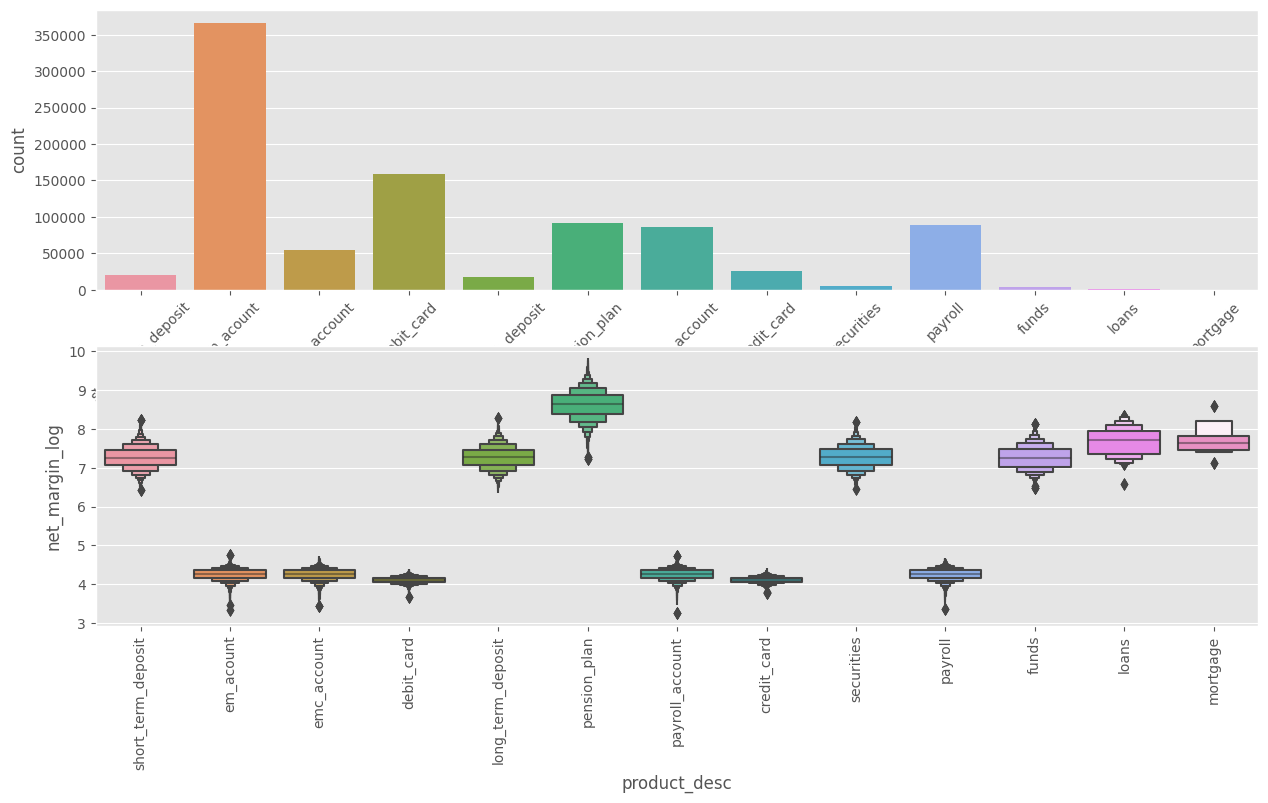

In [ ]:
plot_cat_values(df, 'product_desc', TARGET_LN)

In [ ]:
explore_cat_values(df, 'product_desc', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
product_desc,,,,,
em_acount,366261,0.399939,116000,0.316714,4.252537
debit_card,158414,0.172980,155388,0.980898,4.107475
pension_plan,92029,0.100491,89874,0.976583,8.628815
payroll,89167,0.097366,87063,0.976404,4.251465
payroll_account,85464,0.093322,83153,0.972959,4.251639
emc_account,53758,0.058701,53382,0.993006,4.253224
credit_card,24937,0.027230,24797,0.994386,4.108567
short_term_deposit,19671,0.021480,13175,0.669768,7.260602
long_term_deposit,16882,0.018434,15465,0.916064,7.270473


# Variable: family_product

In [ ]:
explore_cat_values(df, 'family_product', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
family_product,,,,,
account,594650,0.649328,339598,0.571089,4.252150
payment_card,183351,0.200210,180185,0.982733,4.107625
pension_plan,92029,0.100491,89874,0.976583,8.628815
investment,45584,0.049775,37499,0.822635,7.266480
loan,179,0.000195,175,0.977654,7.684370


COMENTARIO: 
* La familia más contratada es la de account. 
* Los clientes antiguos tienen la mayoría de familias contratadas a exepción de una ligera bajada del 82% en investment, y el 57% en account. 
* La familia con margen más rentable son los planes de pensiones, seguido de los loan e investment. 
* Se realizará un OHE

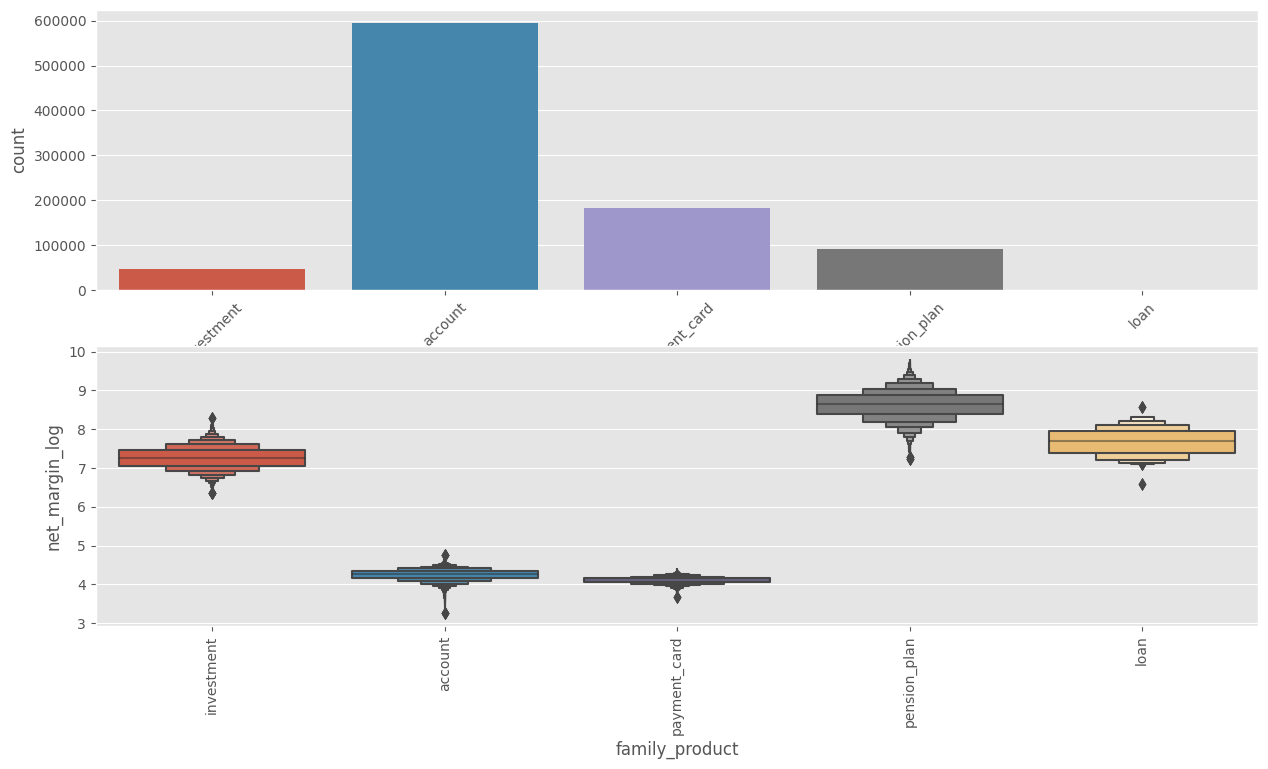

In [ ]:
plot_cat_values(df, 'family_product', TARGET_LN)

# Variable Entry_Channel

In [ ]:
df['entry_channel'].describe()


count     915793
unique        17
top          KFC
freq      129652
Name: entry_channel, dtype: object

La variable no tiene nulos. 
Tiene un total de 46 diferentes canales de entrada
El más frecuente es KFC
Se hará un OHE 

In [ ]:
df['entry_channel'].value_counts()

KFC      129652
ZZZ      128970
KHQ      120115
KHM      117064
KHE       99792
KHK       92483
KHN       80040
KAT       65295
RED       30298
KHL       21795
KFA       17529
KHO        6449
KHF        2263
KHD        1679
Otros       933
KAZ         768
KHC         668
Name: entry_channel, dtype: int64

Se hará una lista con las diferentes entradas a partir de KBG con 202 valores.Se pondrá en 'otros' a el resto, para no tener problemas de baja varianza en las columnas que vamos a crear.

In [ ]:
#channels_freq = df['entry_channel'].value_counts()
#frequent_channels = channels_freq[channels_freq > 300]
#frequent_channels_list = frequent_channels.index.to_list()
#frequent_channels_list.append('Otros')
#df['entry_channel'] = pd.Categorical(df['entry_channel'], categories=frequent_channels_list)
#df['entry_channel'].fillna('Otros', inplace=True)



ValueError: ignored

In [ ]:
df['entry_channel'].value_counts()

KFC      129652
ZZZ      128970
KHQ      120115
KHM      117064
KHE       99792
KHK       92483
KHN       80040
KAT       65295
RED       30298
KHL       21795
KFA       17529
KHO        6449
KHF        2263
KHD        1679
Otros       933
KAZ         768
KHC         668
Name: entry_channel, dtype: int64

In [ ]:
df['entry_channel'].value_counts(normalize=True, dropna=False)

KFC      0.141573
ZZZ      0.140829
KHQ      0.131160
KHM      0.127828
KHE      0.108968
KHK      0.100987
KHN      0.087400
KAT      0.071299
RED      0.033084
KHL      0.023799
KFA      0.019141
KHO      0.007042
KHF      0.002471
KHD      0.001833
Otros    0.001019
KAZ      0.000839
KHC      0.000729
Name: entry_channel, dtype: float64

In [ ]:
explore_cat_values(df, 'entry_channel', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
entry_channel,,,,,
KFC,129652,0.141573,128708,0.992719,5.075508
ZZZ,128970,0.140829,50842,0.394216,4.735799
KHQ,120115,0.131160,26743,0.222645,4.529598
KHM,117064,0.127828,80067,0.683959,4.911710
KHE,99792,0.108968,99638,0.998457,5.035904
KHK,92483,0.100987,74112,0.801358,5.141492
KHN,80040,0.087400,54543,0.681447,4.987536
KAT,65295,0.071299,63653,0.974853,5.042859
RED,30298,0.033084,25543,0.843059,5.057144


#Variable: Segment

In [ ]:
df['segment'].value_counts()

02 - PARTICULARES     450598
03 - UNIVERSITARIO    285923
04 - OTRO             129836
01 - TOP               49436
Name: segment, dtype: int64

In [ ]:
explore_cat_values(df, 'segment', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
segment,,,,,
02 - PARTICULARES,450598,0.492030,366989,0.814449,5.007542
03 - UNIVERSITARIO,285923,0.312214,190486,0.666214,4.985774
04 - OTRO,129836,0.141774,51326,0.395314,4.738332
01 - TOP,49436,0.053982,38530,0.779392,5.264940


#Variable= Country_id

In [ ]:
df['country_id'].value_counts()

ES    915444
GB       111
FR        54
CH        48
US        16
AR        15
CI        15
DE        14
SA        14
CL        12
CM         5
AT         5
BE         5
MX         4
PL         4
ET         4
IE         4
QA         3
CA         3
CN         3
DZ         2
BR         2
RO         2
PE         2
SE         2
Name: country_id, dtype: int64

In [ ]:
explore_cat_values(df, 'country_id', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
country_id,,,,,
ES,915444,0.999619,647014,0.706776,4.995119
GB,111,0.000121,96,0.864865,4.807045
FR,54,0.000059,48,0.888889,5.583667
CH,48,0.000052,46,0.958333,4.890968
US,16,0.000017,13,0.812500,4.914780
AR,15,0.000016,10,0.666667,4.224885
CI,15,0.000016,15,1.000000,5.371703
SA,14,0.000015,14,1.000000,6.106860
DE,14,0.000015,14,1.000000,4.226983


#Variable: region_code

In [ ]:
df['region_code'].value_counts()

28.0    245008
8.0      78073
46.0     59065
41.0     40587
30.0     34279
3.0      34226
15.0     27933
29.0     25361
35.0     21310
11.0     20637
36.0     20552
33.0     18471
50.0     18386
47.0     16829
45.0     15343
18.0     14220
39.0     14158
7.0      12705
37.0     11780
14.0     10801
6.0      10449
12.0      9859
43.0      9419
48.0      8930
2.0       8815
13.0      8717
9.0       8415
21.0      7809
38.0      7542
24.0      7423
10.0      7249
23.0      6899
4.0       6719
17.0      5931
32.0      5306
26.0      5217
27.0      5158
19.0      4985
25.0      4891
20.0      4628
31.0      4231
49.0      3987
34.0      3808
16.0      3358
5.0       3321
40.0      3127
1.0       2927
22.0      2725
42.0      1590
44.0      1188
51.0       655
52.0       438
0.0        353
Name: region_code, dtype: int64

In [ ]:
explore_cat_values(df, 'region_code', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
region_code,,,,,
28.0,245008,0.267536,194997,0.795880,5.030445
8.0,78073,0.085252,54476,0.697757,5.038954
46.0,59065,0.064496,38037,0.643985,5.005255
41.0,40587,0.044319,30824,0.759455,4.964441
30.0,34279,0.037431,21304,0.621488,4.940265
3.0,34226,0.037373,24279,0.709373,4.979376
15.0,27933,0.030501,15649,0.560233,4.929341
29.0,25361,0.027693,19965,0.787232,4.996038
35.0,21310,0.023269,14197,0.666213,5.028450


Se tiene que hacer un procesamiento dependiendo del porcentaje más bajo de servicios contratados y el mayor número de servicios contratados por clientes antiguos y el mayor número de servicios contratados por clientes antiguos.

Variable: gender

In [ ]:
explore_cat_values(df, 'gender', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
gender,,,,,
V,497383,0.543117,362042,0.727894,4.986521
H,418410,0.456883,285289,0.681841,5.006014


Hay un porcentaje mayor de contrataciones en general por parte de los hombres
Tanto hombres como mujeres permanecen de un mes a otro en un 50%
El margen es practicamente el mismo entre hombres y mujeres.

In [ ]:
#creamos una columna nueva con el género numérico en donde 0 es hombre y 1 es mujer
df['gender_num'] = df['gender'].map({'V': 0, 'H': 1}).astype(int)



<Axes: xlabel='family_product', ylabel='count'>

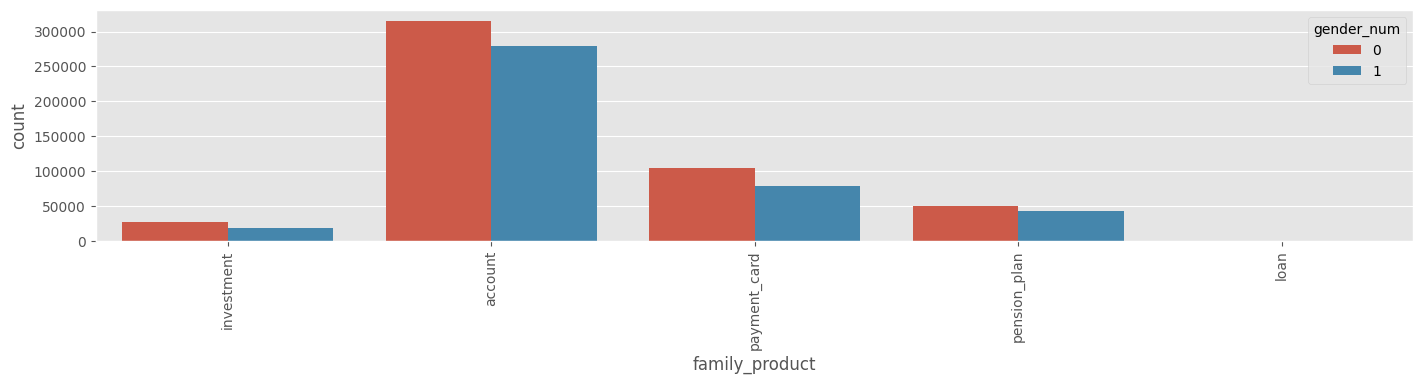

In [ ]:
plt.figure(figsize=[17,3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='family_product', hue='gender_num')

<Axes: xlabel='segment', ylabel='count'>

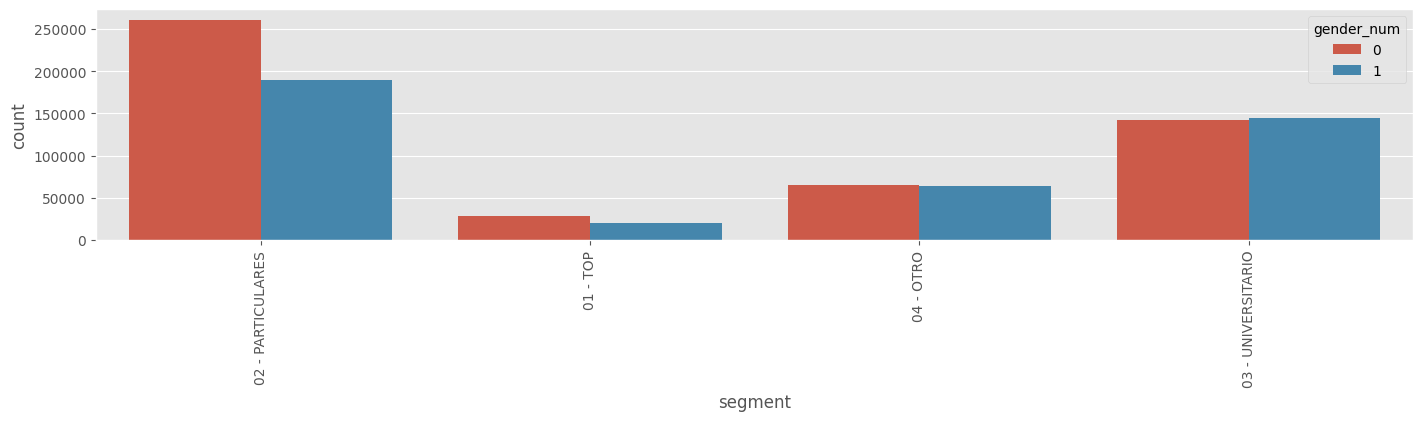

In [ ]:
plt.figure(figsize=[17,3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='segment', hue='gender_num')

En la variable género no se ven diferencias entre los productos o los segmentos. En todas o bien el porcentaje de hombres es mayor o ligeramente parecido.

#Variable:deceased

In [ ]:
df['deceased'].value_counts()

N    915608
S       185
Name: deceased, dtype: int64

In [ ]:
explore_cat_values(df, 'deceased', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
deceased,,,,,
N,915608,0.999798,647174,0.706824,4.995176
S,185,0.000202,157,0.848649,4.729961


Se tiene que decidir que se hace con los clientes muertos para ver si se toman o no en cuenta.

#Variable: Active_customer

In [ ]:
df['active_customer'].value_counts()

1.0    712863
0.0    202930
Name: active_customer, dtype: int64

In [ ]:
explore_cat_values(df, 'active_customer', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
active_customer,,,,,
1.0,712863,0.778411,547817,0.768474,5.04742
0.0,202930,0.221589,99514,0.490386,4.70716


Como en el caso de los muertos, aquí se tiene que tomar la decisión de si estos clientes se siguen tomando en cuenta aunque ya no estén activos.

In [ ]:
#df.to_csv('diccionario.csv', index_label="pk_sale")

In [ ]:
df.dtypes

Unnamed: 0                     int64
pk_sale                        int64
pk_cid                         int64
month_sale                 period[M]
pk_product_ID                  int64
net_margin                   float64
product_desc                  object
family_product                object
entry_date            datetime64[ns]
entry_channel                 object
active_customer              float64
segment                       object
country_id                    object
region_code                  float64
gender                        object
age                            int64
deceased                      object
salary                       float64
short_term_deposit             int64
loans                          int64
mortgage                       int64
funds                          int64
securities                     int64
long_term_deposit              int64
em_account_pp                  int64
credit_card                    int64
payroll                      float64
p

# SANDRA 18 MAYO 2023

NUEVO SANDRA

Se analizan con más detalles el número de transacciones de las variables categóricas para los clientes antiguos.



## Variable Region_code

In [ ]:
df['region_code'].unique()

array([28., 30., 41., 18., 37.,  8.,  9., 31., 20., 13., 47., 50., 45.,
        3., 40., 24.,  4., 35.,  7., 29., 33., 52., 46., 48., 11., 36.,
       15., 14., 27., 39., 10., 38., 22.,  2., 34.,  6., 12.,  1., 17.,
       43., 23., 32., 26., 19.,  0., 49., 21., 25., 16., 42.,  5., 44.,
       51.])

In [ ]:
df['region_code'].isnull().sum()

0

In [ ]:
provincias={1:'Alava',
2:'Albacete',
3:'Alicante',
4:'Almeria',
5:'Avila',
6:'Badajoz',
7:'Baleares',
8:'Barcelona',
9:'Burgos',
10:'Caceres',
11:'Cadiz',
12:'Castellon',
13:'Ciudad Real',
14:'Cordoba',
15:'La Coruna',
16:'Cuenca',
17:'Gerona',
18:'Granada',
19:'Guadalajara',
20:'Guipuzcoa',
21:'Huelva',
22:'Huesca',
23:'Jaen',
24:'Leon',
25:'Lerida',
26:'La Rioja',
27:'Lugo',
28:'Madrid',
29:'Malaga',
30:'Murcia',
31:'Navarra',
32:'Orense',
33:'Asturias',
34:'Palencia',
35:'Las Palmas',
36:'Pontevedra',
37:'Salamanca',
38:'Santa Cruz de Tenerife',
39:'Cantabria',
40:'Segovia',
41:'Sevilla',
42:'Soria',
43:'Tarragona',
44:'Teruel',
45:'Toledo',
46:'Valencia',
47:'Valladolid',
48:'Vizcaya',
49:'Zamora',
50:'Zaragoza',
51:'Ceuta',
52:'Melilla',
0:'Desconocida'}

In [ ]:
df['Provincia']=df['region_code'].map(provincias)

In [ ]:
df[['region_code','Provincia']]

,region_code,Provincia
0,28.0,Madrid
1,28.0,Madrid
2,28.0,Madrid
3,28.0,Madrid
4,28.0,Madrid
...,...,...
915788,28.0,Madrid
915789,49.0,Zamora
915790,8.0,Barcelona
915791,45.0,Toledo


In [ ]:
#comparamos el codigo de la región con el target. Se guarda en un df diferente
_region_results= df[df['cliente_antiguo'] == 1].pivot_table(index='Provincia', values="net_margin", aggfunc=[len, np.mean])
_region_results.columns = ['transactions', 'mean_net_margin']

In [ ]:
_region_results.head()

,transactions,mean_net_margin
Provincia,,
Alava,2054,678.931061
Albacete,5546,860.084638
Alicante,24279,998.880164
Almeria,5171,985.693580
Asturias,11723,936.985934


In [ ]:
_region_results['n_rows'] = df['Provincia'].value_counts(dropna=False)

In [ ]:
_region_results.head()

,transactions,mean_net_margin,n_rows
Provincia,,,
Alava,2054,678.931061,2927
Albacete,5546,860.084638,8815
Alicante,24279,998.880164,34226
Almeria,5171,985.693580,6719
Asturias,11723,936.985934,18471


In [ ]:
_region_results['pct_rows'] = df['Provincia'].value_counts(normalize=True, dropna=False)
_region_results['pct_transactions'] = _region_results['transactions'] / _region_results['n_rows']
_region_results.head()

,transactions,mean_net_margin,n_rows,pct_rows,pct_transactions
Provincia,,,,,
Alava,2054,678.931061,2927,0.003196,0.701742
Albacete,5546,860.084638,8815,0.009626,0.629155
Alicante,24279,998.880164,34226,0.037373,0.709373
Almeria,5171,985.693580,6719,0.007337,0.769609
Asturias,11723,936.985934,18471,0.020169,0.634671


In [ ]:
region_results_sorted = _region_results.sort_values('n_rows', ascending=False)
print(region_results_sorted.head())

           transactions  mean_net_margin  n_rows  pct_rows  pct_transactions
Provincia                                                                   
Madrid           194997       976.695335  245008  0.267536          0.795880
Barcelona         54476      1039.307915   78073  0.085252          0.697757
Valencia          38037       997.386016   59065  0.064496          0.643985
Sevilla           30824       982.543826   40587  0.044319          0.759455
Murcia            21304       957.125070   34279  0.037431          0.621488


In [ ]:
explore_cat_values(df, 'Provincia', 'net_margin')

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
Provincia,,,,,
Madrid,245008,0.267536,194997,0.795880,976.695335
Barcelona,78073,0.085252,54476,0.697757,1039.307915
Valencia,59065,0.064496,38037,0.643985,997.386016
Sevilla,40587,0.044319,30824,0.759455,982.543826
Murcia,34279,0.037431,21304,0.621488,957.125070
Alicante,34226,0.037373,24279,0.709373,998.880164
La Coruna,27933,0.030501,15649,0.560233,896.340252
Malaga,25361,0.027693,19965,0.787232,1015.005009
Las Palmas,21310,0.023269,14197,0.666213,1094.090111


Aunque Madrid es la que mayor núnmero de clientes tiene en total, en el resto de las provincias el porcentaje de transacciones también es alto, aunque su número de clientes sea menor. Se eliminará la columna de 'region_code' y se transforma la variable provincia al OHE

## variable Active_Customer

In [ ]:
df['active_customer'].describe()

count    915793.000000
mean          0.778411
std           0.415316
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: active_customer, dtype: float64

<Axes: xlabel='active_customer', ylabel='net_margin_log'>

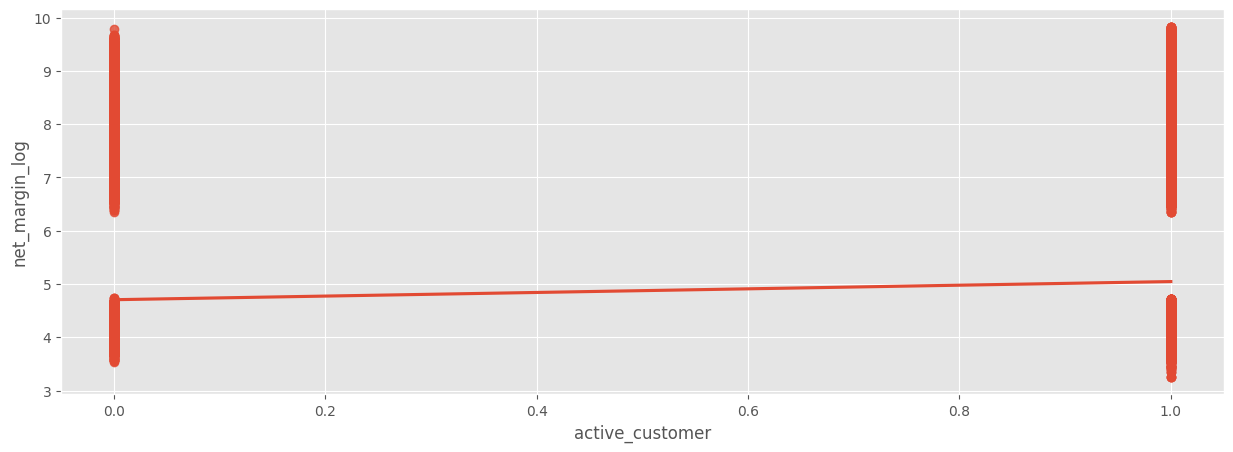

In [ ]:
plt.figure(figsize=(15,5))
sns.regplot(
    data=df[df['cliente_antiguo'] == 1],
    x='active_customer',
    y=TARGET_LN
)

In [ ]:
df[['active_customer', "cliente_antiguo"]].corr(method = 'pearson')

,active_customer,cliente_antiguo
active_customer,1.00000,0.25372
cliente_antiguo,0.25372,1.00000


In [ ]:
df[['active_customer', "cliente_antiguo"]].corr(method = 'spearman')

,active_customer,cliente_antiguo
active_customer,1.00000,0.25372
cliente_antiguo,0.25372,1.00000


In [ ]:
df['active_customer'].value_counts()

1.0    712863
0.0    202930
Name: active_customer, dtype: int64

In [ ]:
df['cliente_antiguo'].value_counts()

1    647331
0    268462
Name: cliente_antiguo, dtype: int64

<Axes: xlabel='active_customer', ylabel='count'>

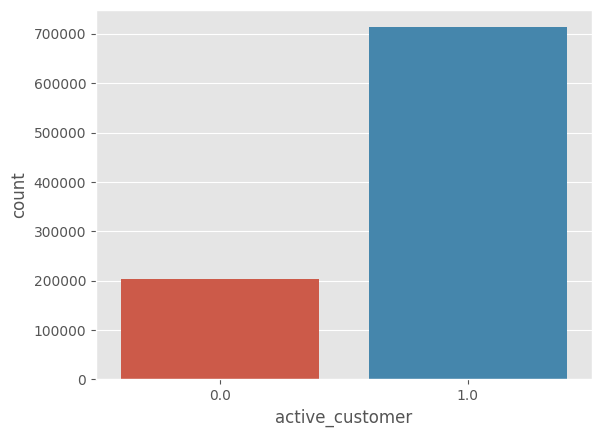

In [ ]:
sns.countplot(data=df, x='active_customer')

Transformamos esta variable también a categorica (objeto) para después procesarla a través de un OHE

In [ ]:
df['active_customer2'] = df['active_customer'].astype("category")

In [ ]:
df['active_customer2'].dtypes

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

## Variable: Identificadores de venta, producto y cliente


In [ ]:
df['pk_cid'].describe()

count    9.157930e+05
mean     1.342924e+06
std      1.773470e+05
min      1.589100e+04
25%      1.256953e+06
50%      1.394295e+06
75%      1.457470e+06
max      1.553571e+06
Name: pk_cid, dtype: float64

<ipython-input-245-1edfd9cbebf5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


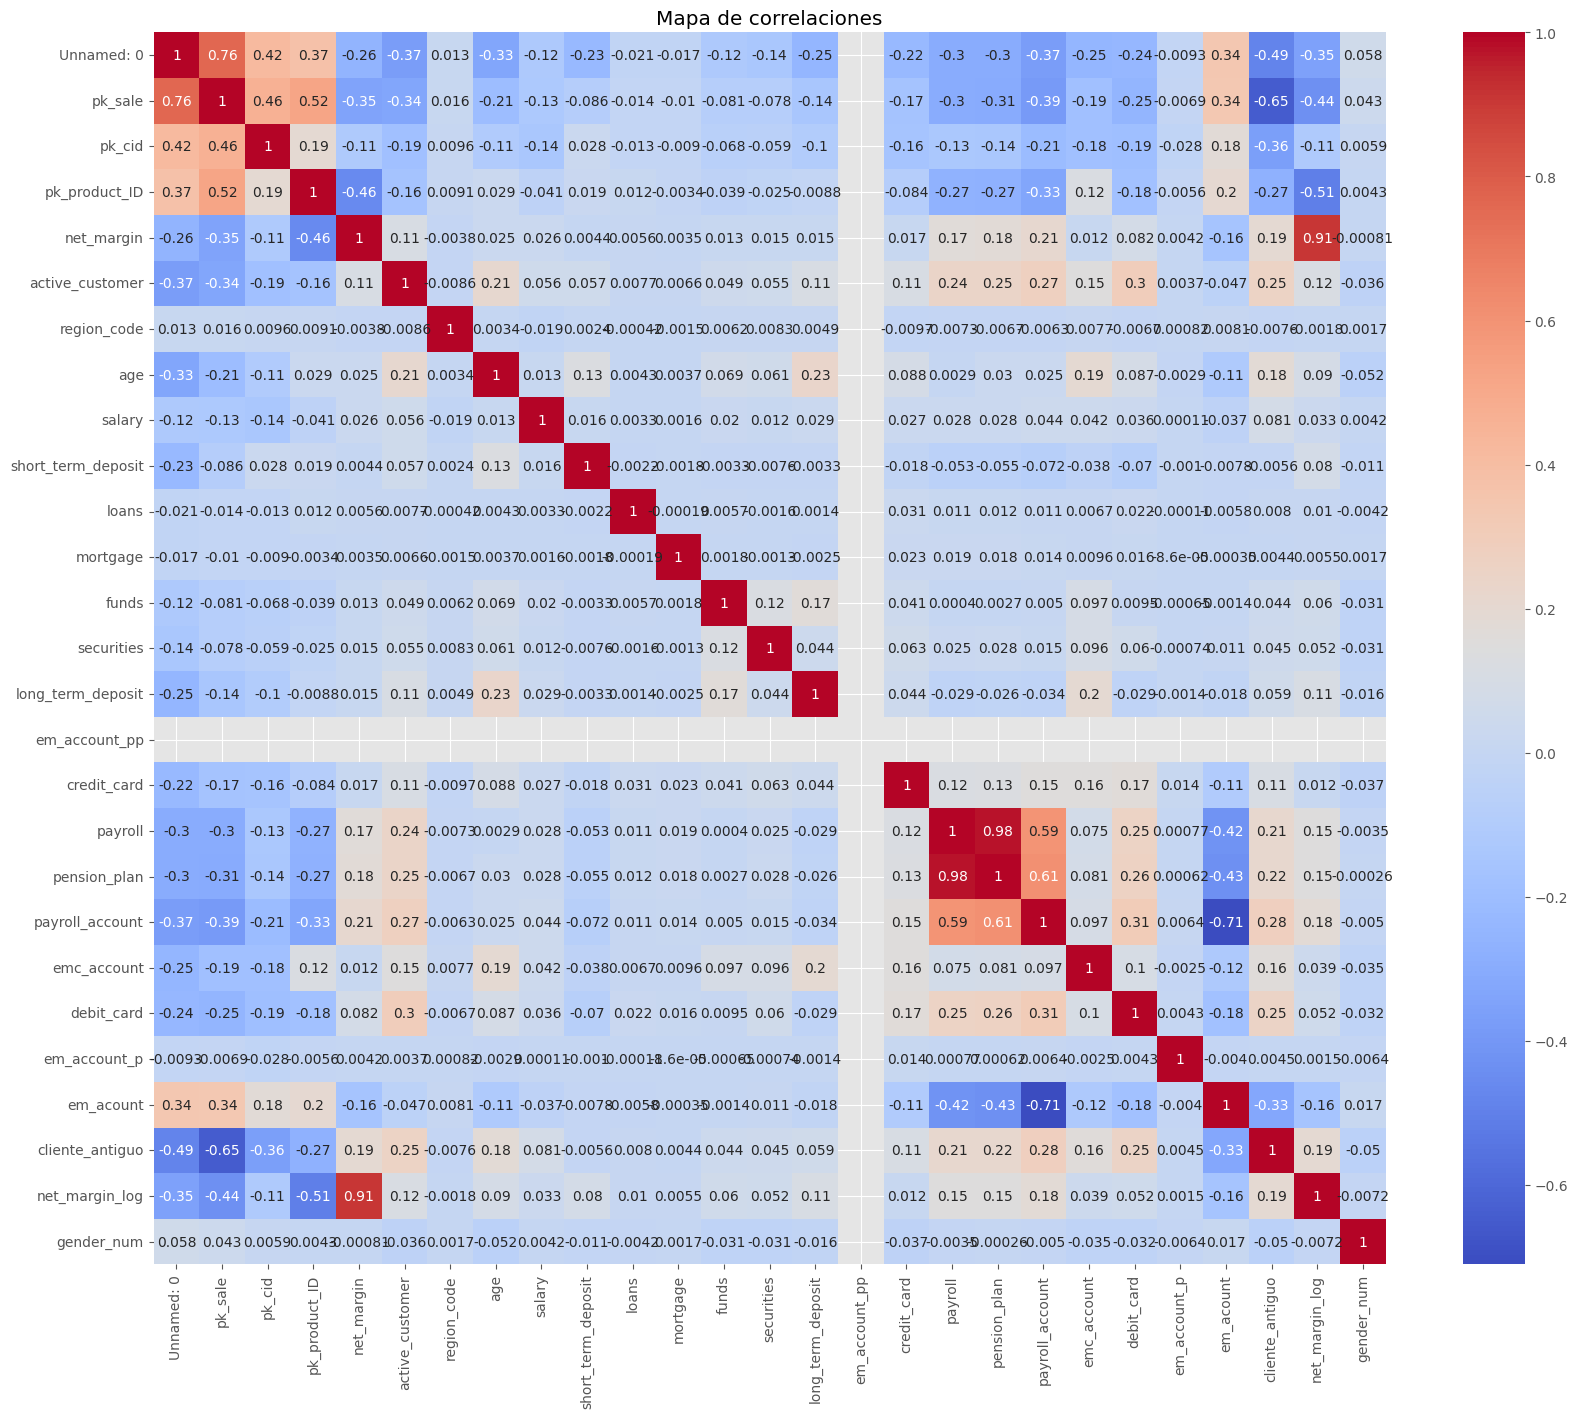

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Graficar el mapa de correlaciones
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Añadir título
plt.title('Mapa de correlaciones')

# Mostrar el gráfico
plt.show()

Las que podríamos eliminar porque tienen una alta correlación (casi 1 o -1) o ningún tipo de relación (casi 0), lo que nos diría que tiene prácticamente la misma información son: 

1.   payroll y pension_plan
2.   gender_num y practicamente todas las del resto de la tabla

Se decide quitar el payrolll y gender_num



In [ ]:
df['em_account_pp'].describe()

count    915793.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: em_account_pp, dtype: float64

In [ ]:
df['em_account_pp'].unique()

array([0])

Esta columna directamente se borra.

In [ ]:
df.drop('em_account_pp', axis=1, inplace=True)

Después de ver todas las correlaciones, los identificadores de venta y cliente se recomienda eliminarlos. 
para el de producto, se recomienda transformarlo en objeto para después hacer un OHE


In [ ]:
#df.drop('pk_cid', axis=1, inplace=True)

In [ ]:
#df.drop('pk_sale', axis=1, inplace=True)

In [ ]:
df['pk_product_ID2'] = df['pk_product_ID'].astype("object")

In [ ]:
explore_cat_values(df, 'pk_product_ID2', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
pk_product_ID2,,,,,
4657,366261,0.399939,116000,0.316714,4.252537
3819,158414,0.172980,155388,0.980898,4.107475
1364,92029,0.100491,89874,0.976583,8.628815
2234,89167,0.097366,87063,0.976404,4.251465
2235,85464,0.093322,83153,0.972959,4.251639
8871,53758,0.058701,53382,0.993006,4.253224
2312,24937,0.027230,24797,0.994386,4.108567
2335,19671,0.021480,13175,0.669768,7.260602
2336,16882,0.018434,15465,0.916064,7.270473


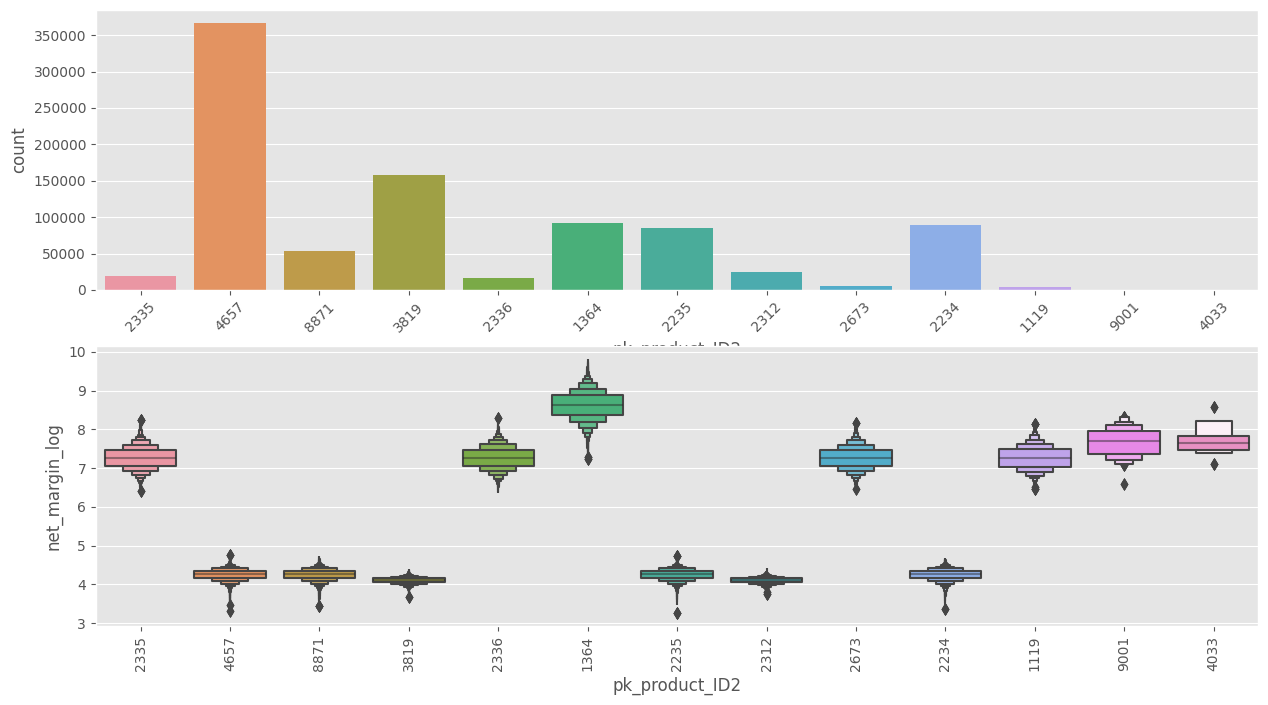

In [ ]:
plot_cat_values(df, 'pk_product_ID2', TARGET_LN)

In [ ]:
print(df.groupby('pk_product_ID2')['product_desc'].unique().reset_index())

    pk_product_ID2          product_desc
0             1119               [funds]
1             1364        [pension_plan]
2             2234             [payroll]
3             2235     [payroll_account]
4             2312         [credit_card]
5             2335  [short_term_deposit]
6             2336   [long_term_deposit]
7             2673          [securities]
8             3819          [debit_card]
9             4033            [mortgage]
10            4657           [em_acount]
11            8871         [emc_account]
12            9001               [loans]


In [ ]:
#Como los valores únicos de pk_product corresponden a 1 y sólo 1 product_desc, se borrará pk_product_ID

In [ ]:
df.drop('pk_product_ID', axis=1, inplace=True)
df.drop('pk_product_ID2', axis=1, inplace=True)

## Variable: Age

In [ ]:
df['age'].describe()

count    915793.000000
mean         34.737772
std          13.324116
min           2.000000
25%          24.000000
50%          32.000000
75%          42.000000
max         102.000000
Name: age, dtype: float64

In [ ]:
df[['age', TARGET_LN]].corr()

,age,net_margin_log
age,1.000000,0.090159
net_margin_log,0.090159,1.000000


Parece que hay una baja correlación entre la edad y el margen neto log.

In [ ]:
#Para facilitar el análisis, se decide hacer una nueva columna con edades agrupadas de 0 a 18 años que son menores de edad
# y después de 10 en 10 hasta los ochenta años
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, np.inf], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+'])
descriptive_stats = df.groupby('age_group')['net_margin'].describe()
print(descriptive_stats)

              count         mean          std   min   25%     50%     75%  \
age_group                                                                   
0-18          161.0  4078.177019  3626.861729  49.4  70.2  4413.0  7122.6   
19-30      410807.0   650.263610  1881.317272  25.0  61.5    69.1    78.5   
31-40      253263.0   871.516315  2100.484578  29.3  61.1    69.0    81.2   
41-50      139188.0   759.444141  1861.771699  31.4  61.2    69.2    82.4   
51-60       65055.0   715.432878  1741.820183  33.0  61.4    69.9    84.1   
61-70       28512.0   639.278553  1507.046850  34.7  62.1    71.0    87.4   
71-80       11469.0   601.001029  1276.889567  31.1  62.7    72.3   901.1   
80+          7338.0   706.661297  1537.264647  39.7  63.6    73.2   978.8   

               max  
age_group           
0-18       11543.4  
19-30      18466.4  
31-40      17615.6  
41-50      17699.0  
51-60      15692.0  
61-70      13627.9  
71-80      12145.3  
80+        13168.9  


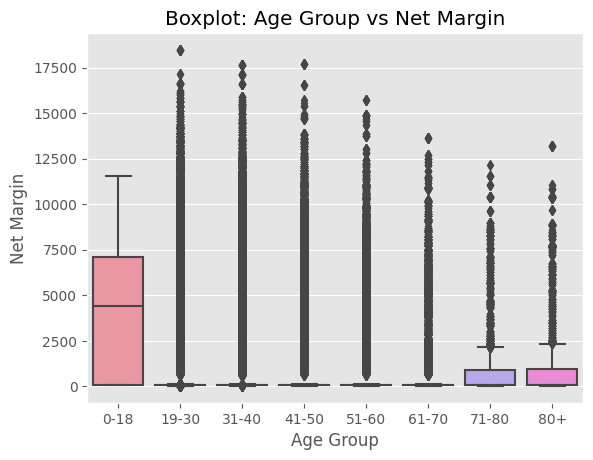

In [ ]:
sns.boxplot(x=df['age_group'], y=df['net_margin'])
plt.xlabel('Age Group')
plt.ylabel('Net Margin')
plt.title('Boxplot: Age Group vs Net Margin')
plt.show()

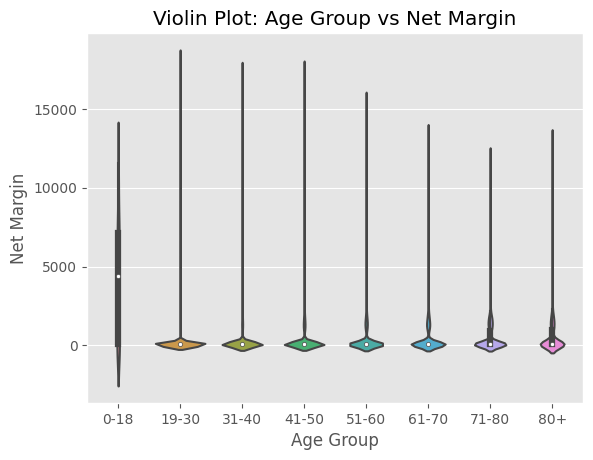

In [ ]:
sns.violinplot(x=df['age_group'], y=df['net_margin'])
plt.xlabel('Age Group')
plt.ylabel('Net Margin')
plt.title('Violin Plot: Age Group vs Net Margin')
plt.show()

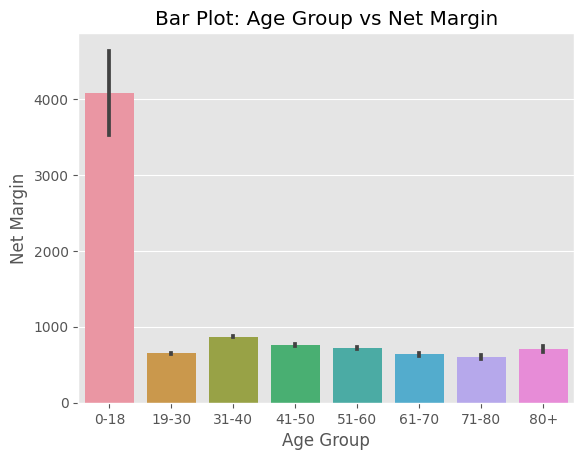

In [ ]:
sns.barplot(x='age_group', y='net_margin', data=df)
plt.xlabel('Age Group')
plt.ylabel('Net Margin')
plt.title('Bar Plot: Age Group vs Net Margin')
plt.show()

Podríamos borrar la variable edad y para esta variable age group, hacer un OHE

**hacer un análisis de grupos de edad y productos
hacer grupos de edad y segmento

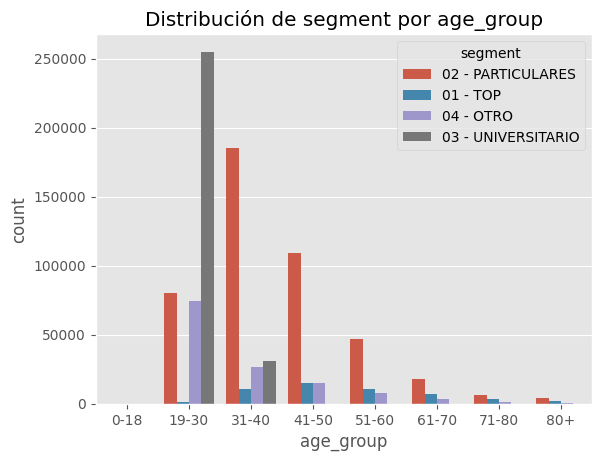

In [ ]:
sns.countplot(x='age_group', hue='segment', data=df)
plt.title('Distribución de segment por age_group')
plt.show()

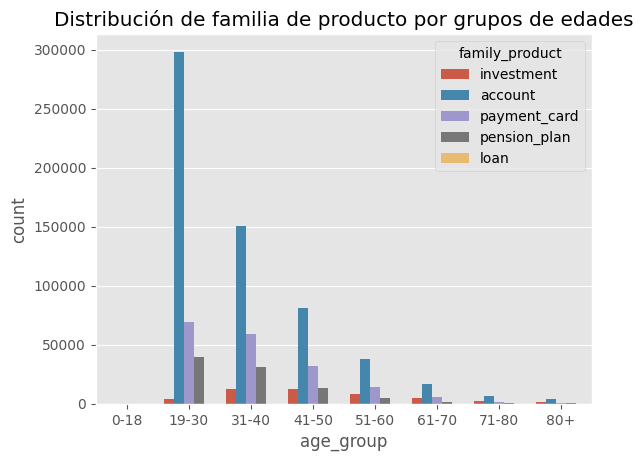

In [ ]:
sns.countplot(x='age_group', hue='family_product', data=df)
plt.title('Distribución de familia de producto por grupos de edades')
plt.show()

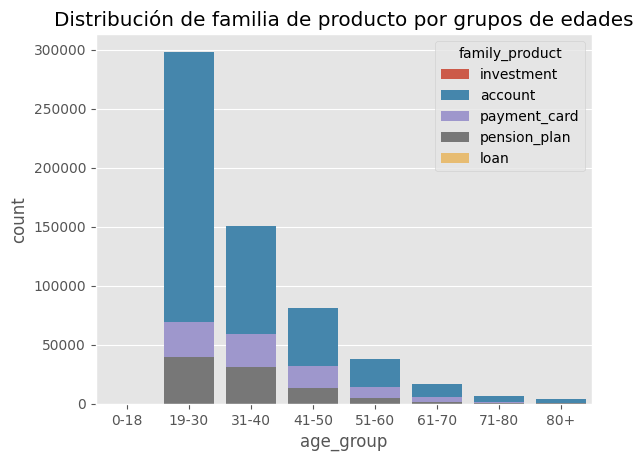

In [ ]:
sns.countplot(x='age_group', hue='family_product', data=df, dodge=False)
plt.title('Distribución de familia de producto por grupos de edades')
plt.show()

In [ ]:
# Crear una tabla en donde podamos analizar el margen neto por grupo de edad y familia de producto, sacando su media y contando el número de valores.
pivot_table = pd.pivot_table(df, values='net_margin', index='age_group', columns='family_product', 
                             aggfunc=['mean', 'count'])

# Imprimir la tabla pivote
print(pivot_table)


                     mean                                                      \
family_product    account   investment         loan payment_card pension_plan   
age_group                                                                       
0-18            69.233333          NaN          NaN    60.600000  6589.003030   
19-30           69.985738  1508.102988  2852.780000    60.000460  5988.897391   
31-40           69.941421  1483.106193  2123.185882    60.011875  5975.554432   
41-50           69.949542  1495.053455  2303.366667    60.011159  5915.891596   
51-60           70.037776  1497.237946  2005.835294    60.026123  5996.959470   
61-70           70.158095  1493.778036          NaN    60.130172  5974.632606   
71-80           69.936049  1498.240401          NaN    59.575833  6077.104750   
80+             70.349146  1493.747880          NaN    60.550052  6244.330412   

                 count                                            
family_product account investment loan pa

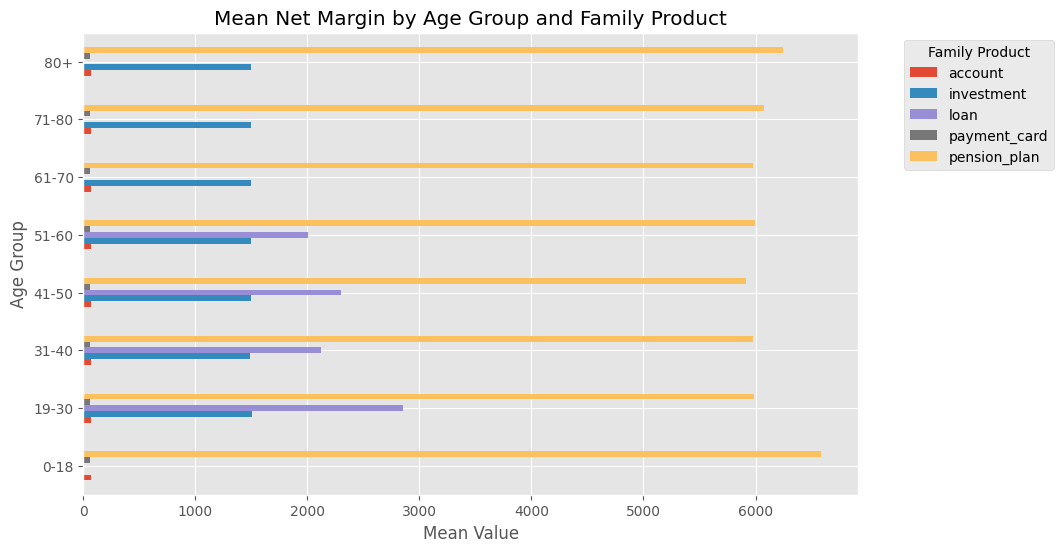

In [ ]:
# Seleccionar la columna de la media de la tabla pivote
mean_values = pivot_table[('mean',)]

# Graficar la media con un gráfico de barras horizontales
mean_values.plot(kind='barh', figsize=(10, 6), legend=False)

# Añadir etiquetas de eje y título
plt.xlabel('Mean Value')
plt.ylabel('Age Group')
plt.title('Mean Net Margin by Age Group and Family Product')

# Añadir leyenda
plt.legend(title='Family Product', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Aquí puede observarse que la familia de productos más rentable para cualquier rango de edad son los planes de pensiones, seguido de los préstamos y después por las inversiones. 

Sin embargo el producto más vendido son las cuentas seguido de los payment card para todos los rangos de edades. 



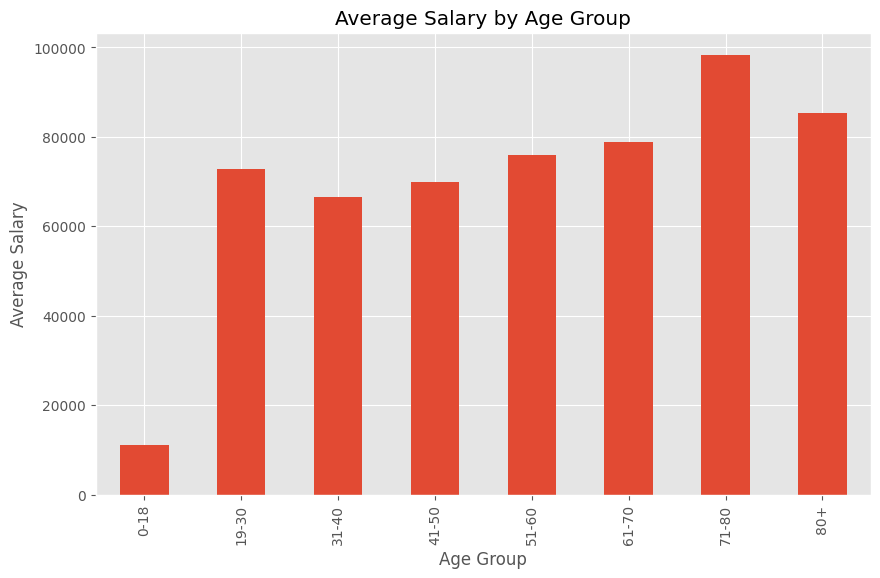

In [ ]:
# Calcular el promedio de salario por 'age_group'
average_salary = df.groupby('age_group')['salary'].mean()

# Graficar el promedio de salario
average_salary.plot(kind='bar', figsize=(10, 6))

# Añadir etiquetas de eje y título
plt.xlabel('Age Group')
plt.ylabel('Average Salary')
plt.title('Average Salary by Age Group')

# Mostrar el gráfico
plt.show()

## Variable salary

In [ ]:
df['salary'].describe()

count    9.157930e+05
mean     7.145467e+04
std      1.800767e+05
min      0.000000e+00
25%      0.000000e+00
50%      5.530086e+04
75%      1.033021e+05
max      2.889440e+07
Name: salary, dtype: float64

In [ ]:
df['salary'].nunique()

73286

In [ ]:
# Crear la tabla pivote con el promedio de 'salary' para cada combinación de 'age_group' y 'segment'
pivot_table = df.pivot_table(values='salary', index='age_group', columns='segment', aggfunc='mean')
print(pivot_table)

segment         01 - TOP  02 - PARTICULARES  03 - UNIVERSITARIO     04 - OTRO
age_group                                                                    
0-18                 NaN       11441.101654                 NaN   9401.339118
19-30      112138.452647       74165.687833        81814.613393  40482.255969
31-40       85946.380769       68461.766520        85660.692823  22423.421283
41-50       89845.140380       73252.339136        87131.193285  26583.641206
51-60       98695.362895       78349.320811        94344.000000  29264.982395
61-70      101774.832014       79210.462832       152822.200000  30603.571712
71-80      118788.094205      101468.242603                 NaN  29970.001379
80+        108113.933162       82100.542051                 NaN  40112.837410


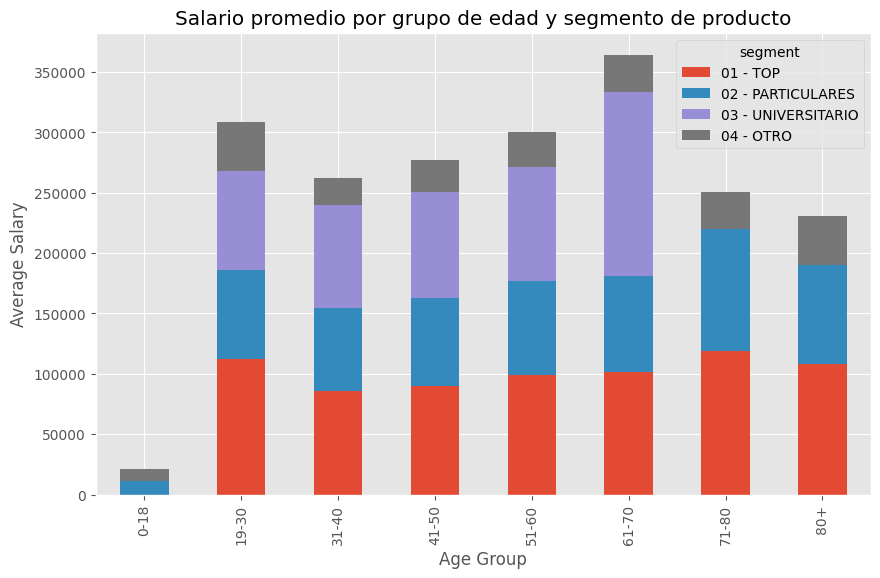

In [ ]:
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir etiquetas de eje y título
plt.xlabel('Age Group')
plt.ylabel('Average Salary')
plt.title('Salario promedio por grupo de edad y segmento de producto')

# Mostrar la leyenda
plt.legend(title='segment')

# Mostrar el gráfico
plt.show()

La variable salario no está siendo predictiva para grupos de edad ni por tipo de segmentos de productos. 

<Axes: xlabel='salary', ylabel='net_margin'>

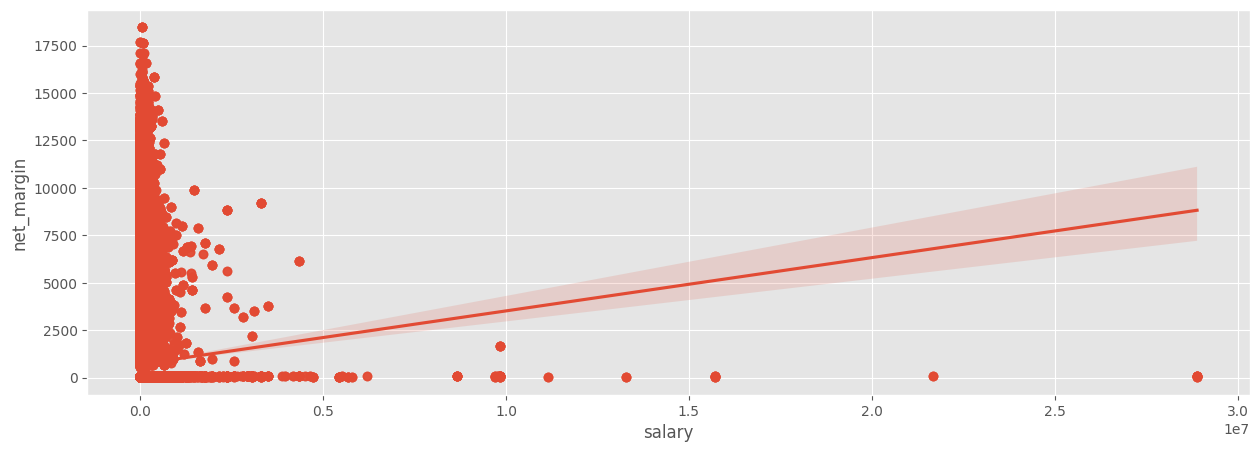

In [ ]:
plt.figure(figsize=(15,5))
sns.regplot(
    data=df,
    x='salary',
    y=TARGET
)

In [ ]:
#se vuelve a hacer la transformación logarítmica para extender la distribución.
df['salary_LN'] = df['salary'].apply(lambda x: np.log1p(x))

<Axes: xlabel='salary_LN', ylabel='net_margin'>

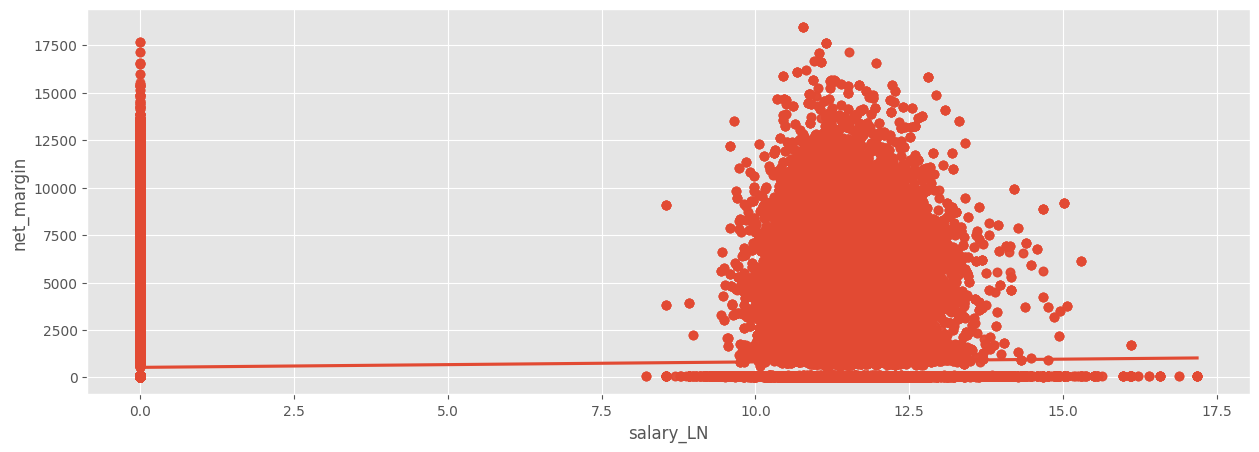

In [ ]:
plt.figure(figsize=(15,5))
sns.regplot(
    data=df,
    x='salary_LN',
    y=TARGET
)

In [ ]:
df[['salary_LN', TARGET]].corr()

,salary_LN,net_margin
salary_LN,1.000000,0.084168
net_margin,0.084168,1.000000


No se encuentra ninguna correlación entre el salario y el margen neto log.


In [ ]:
df[['salary_LN', 'age']].corr()

,salary_LN,age
salary_LN,1.000000,0.023225
age,0.023225,1.000000


Tiene una buena correlación entre edad y salario, lo que es más o o menos lógico.

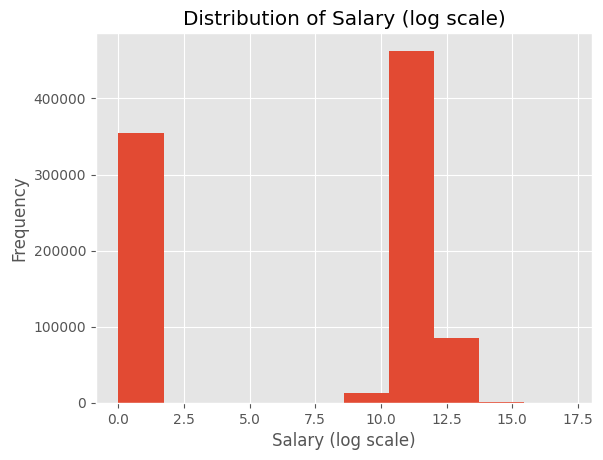

In [ ]:
# Graficar histograma de la variable "salary_LN"
plt.hist(df['salary_LN'], bins=10)

# Añadir etiquetas de eje y título
plt.xlabel('Salary (log scale)')
plt.ylabel('Frequency')
plt.title('Distribution of Salary (log scale)')

# Mostrar el gráfico
plt.show()

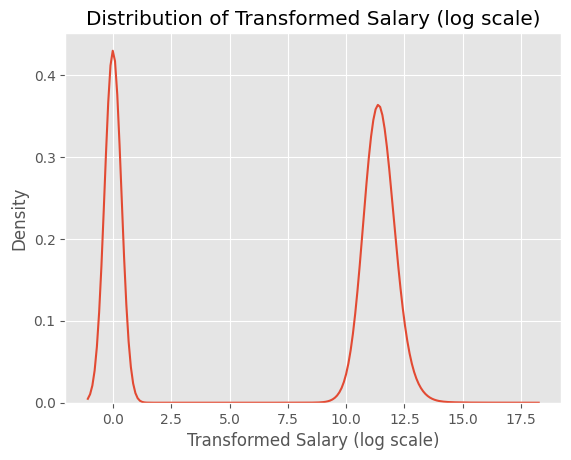

In [ ]:
# Graficar la densidad de la variable transformada
sns.kdeplot(df['salary_LN'])

# Añadir etiquetas de eje y título
plt.xlabel('Transformed Salary (log scale)')
plt.ylabel('Density')
plt.title('Distribution of Transformed Salary (log scale)')

# Mostrar el gráfico
plt.show()

In [ ]:
df['salary'].unique()

array([138618.57, 125530.41,      0.  , ..., 132889.62,  58476.27,
        52924.44])

In [ ]:
df['salary'].min()

0.0

In [ ]:
df['salary'].max()

28894395.51

In [ ]:
print(df['salary'].nsmallest(10))

12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
Name: salary, dtype: float64


In [ ]:
print(df['salary'].nlargest(20))

513471    28894395.51
513472    28894395.51
513473    28894395.51
513474    28894395.51
513475    28894395.51
513476    28894395.51
513477    28894395.51
513478    28894395.51
513479    28894395.51
513480    28894395.51
513481    28894395.51
513482    28894395.51
520726    21674246.67
520727    21674246.67
520728    21674246.67
632134    15711716.46
632135    15711716.46
632136    15711716.46
632137    15711716.46
632138    15711716.46
Name: salary, dtype: float64


In [ ]:
print(df[df['salary'] == df['salary'].max()].shape[0])

12


In [ ]:
print(df[df['salary'] == df['salary'].min()].shape[0])

354178


In [ ]:
#Para mejorar la distribución de salario, se realiza un minmax scaler
# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos de 'salary' utilizando el scaler
df['salary_scaled'] = scaler.fit_transform(df['salary'].values.reshape(-1, 1))

# Mostrar los datos escalados
print(df['salary_scaled'])

0         0.004797
1         0.004797
2         0.004797
3         0.004797
4         0.004797
            ...   
915788    0.000000
915789    0.000000
915790    0.000000
915791    0.000000
915792    0.000000
Name: salary_scaled, Length: 915793, dtype: float64


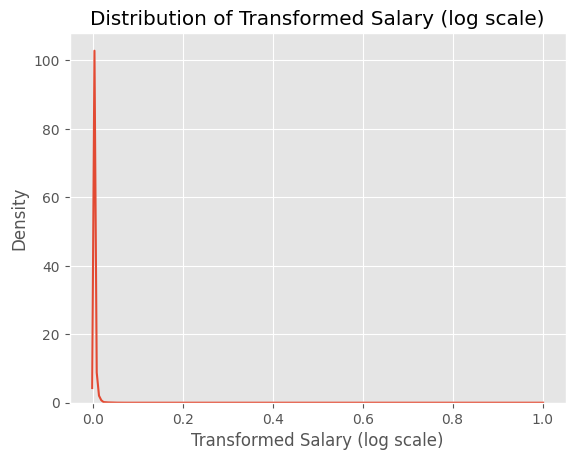

In [ ]:
# Graficar la densidad de la variable transformada
sns.kdeplot(df['salary_scaled'])

# Añadir etiquetas de eje y título
plt.xlabel('Transformed Salary (log scale)')
plt.ylabel('Density')
plt.title('Distribution of Transformed Salary (log scale)')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='salary_scaled', ylabel='net_margin'>

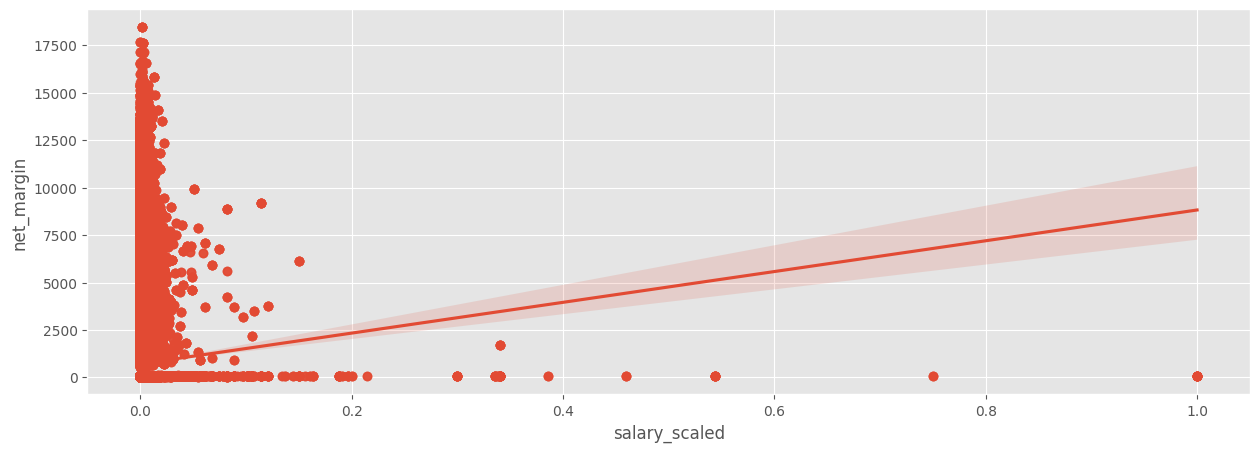

In [ ]:
#SE analizan las variables con el salario transformado
plt.figure(figsize=(15,5))
sns.regplot(
    data=df,
    x='salary_scaled',
    y=TARGET
)

Puede utilizarse el maxmin Scaler para salario en lugar de la logarítmica. 

##Creación de variable 

Se realizarán una columna para crear nuestro nuevo target, que será si el cliente compra o no compra con respecto al mes anterior


In [ ]:
df2 = df.copy()

In [ ]:
# Lista de columnas relevantes para el análisis
columnas_productos = ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 
                      'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'em_acount', 'debit_card', 'em_account_p', 'em_acount']

# Crear columna para indicar si el cliente compró nuevos productos
df2['compro_nuevos_productos'] = 0

# Agrupar por "pk_cid"
groups = df2.groupby('pk_cid')

# Iterar sobre cada grupo
for _, group in groups:
    # Obtener los productos de la fila anterior si hay suficientes filas
    if len(group) > 1:
        productos_anterior = group[columnas_productos].iloc[-2]
    else:
        productos_anterior = 0
    
    # Obtener los productos de la fila actual
    productos_actual = group[columnas_productos].iloc[-1]
    
    # Verificar si hay nuevos productos
    nuevos_productos = (productos_actual != productos_anterior) & (productos_actual > 0)
    
    # Actualizar la columna "compro_nuevos_productos"
    df2.loc[group.index[-1], 'compro_nuevos_productos'] = int(nuevos_productos.any())

# Imprimir el DataFrame resultante
print(df2)

        Unnamed: 0  pk_sale   pk_cid month_sale  net_margin  \
0                0     6666    33620    2018-05       952.9   
1                1     6666    33620    2018-05       952.9   
2                2     6666    33620    2018-05       952.9   
3                3   130018    33620    2018-04        71.6   
4                4   130018    33620    2018-04        71.6   
...            ...      ...      ...        ...         ...   
915788      915788   247434  1553456    2019-05        56.7   
915789      915789   247435  1553541    2019-05        66.5   
915790      915790   247436  1553559    2019-05        73.0   
915791      915791   247437  1553565    2019-05        82.3   
915792      915792   247438  1553571    2019-05        84.4   

              product_desc family_product entry_date entry_channel  \
0       short_term_deposit     investment 2018-04-01           KHK   
1       short_term_deposit     investment 2018-04-01           KHK   
2       short_term_deposit     in

Hay que hacer más análisis de este nuevo target con todas las variables

In [ ]:
TARGET_NV = 'compro_nuevos_productos'
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,915793.0,4.578960e+05,264366.811874,0.000000,2.289480e+05,4.578960e+05,6.868440e+05,9.157920e+05
pk_sale,915793.0,1.133754e+05,67142.111310,6666.000000,5.522200e+04,1.069730e+05,1.678940e+05,2.474380e+05
pk_cid,915793.0,1.342924e+06,177347.034175,15891.000000,1.256953e+06,1.394295e+06,1.457470e+06,1.553571e+06
net_margin,915793.0,7.327701e+02,1916.633977,25.000000,6.140000e+01,6.930000e+01,8.020000e+01,1.846640e+04
active_customer,915793.0,7.784106e-01,0.415316,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
region_code,915793.0,2.643741e+01,13.343831,0.000000,1.500000e+01,2.800000e+01,3.600000e+01,5.200000e+01
age,915793.0,3.473777e+01,13.324116,2.000000,2.400000e+01,3.200000e+01,4.200000e+01,1.020000e+02
salary,915793.0,7.145467e+04,180076.723885,0.000000,0.000000e+00,5.530086e+04,1.033021e+05,2.889440e+07
short_term_deposit,915793.0,2.121331e-02,0.144095,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
loans,915793.0,2.271256e-04,0.015069,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
df2[TARGET_NV].value_counts()

0    880489
1     35304
Name: compro_nuevos_productos, dtype: int64

<Axes: xlabel='compro_nuevos_productos', ylabel='count'>

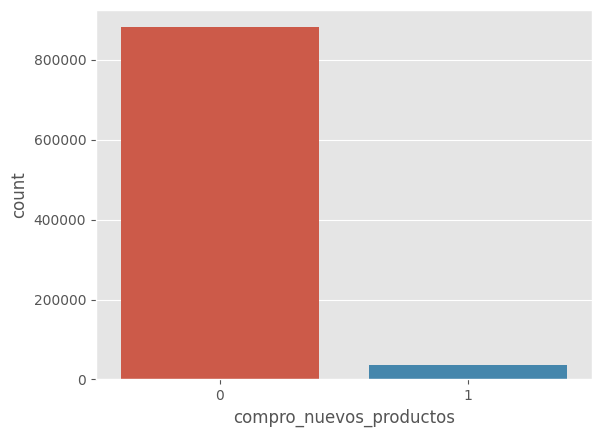

In [ ]:
sns.countplot(data=df2, x=TARGET_NV)

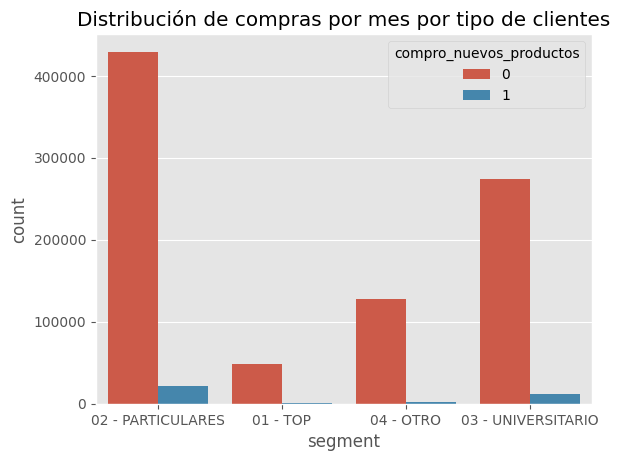

In [ ]:
sns.countplot(x='segment', hue=TARGET_NV, data=df2)
plt.title('Distribución de compras por mes por tipo de clientes')
plt.show()

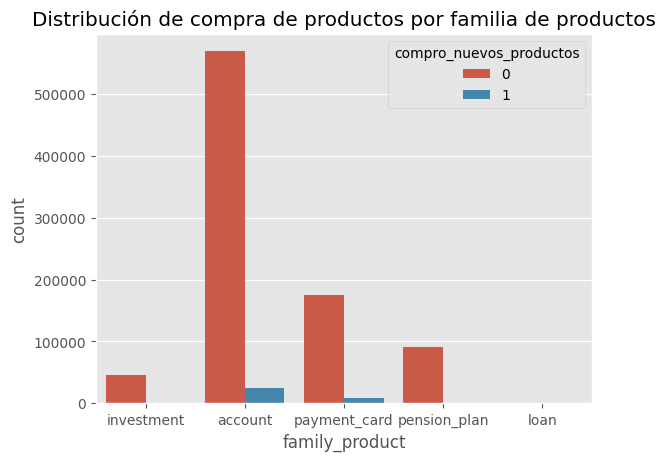

In [ ]:
sns.countplot(x='family_product', hue=TARGET_NV, data=df2)
plt.title('Distribución de compra de productos por familia de productos')
plt.show()

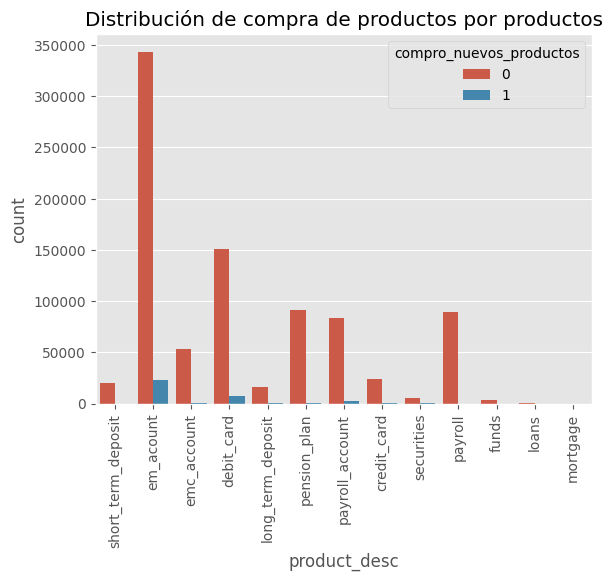

In [ ]:
sns.countplot(x='product_desc', hue=TARGET_NV, data=df2)
plt.xticks(rotation=90)  # Rotar las etiquetas en 90 grados
plt.title('Distribución de compra de productos por productos')
plt.show()

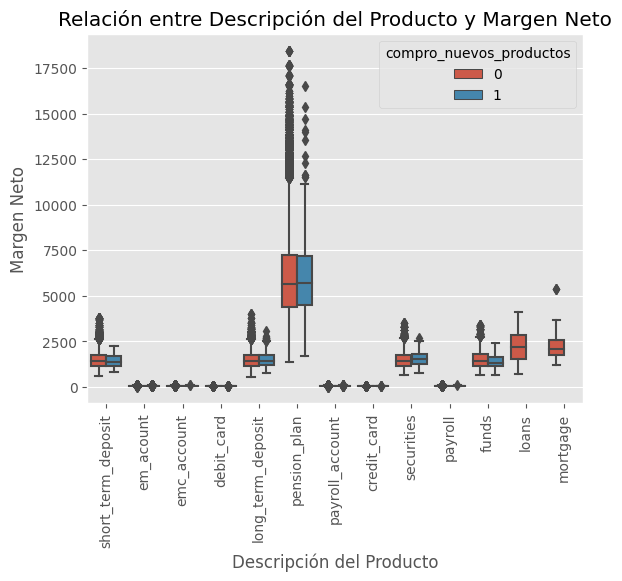

In [ ]:
sns.boxplot(x='product_desc', y='net_margin', hue=TARGET_NV, data=df2)

# Añadir etiquetas de eje y título
plt.xlabel('Descripción del Producto')
plt.ylabel('Margen Neto')
plt.title('Relación entre Descripción del Producto y Margen Neto')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Aquí podemos ver que los productos nuevos más rentables son planes de pensiones, depósitos a croto palzo, seguros, depositos a largo plazo, fondos y préstamos, en ese orden.

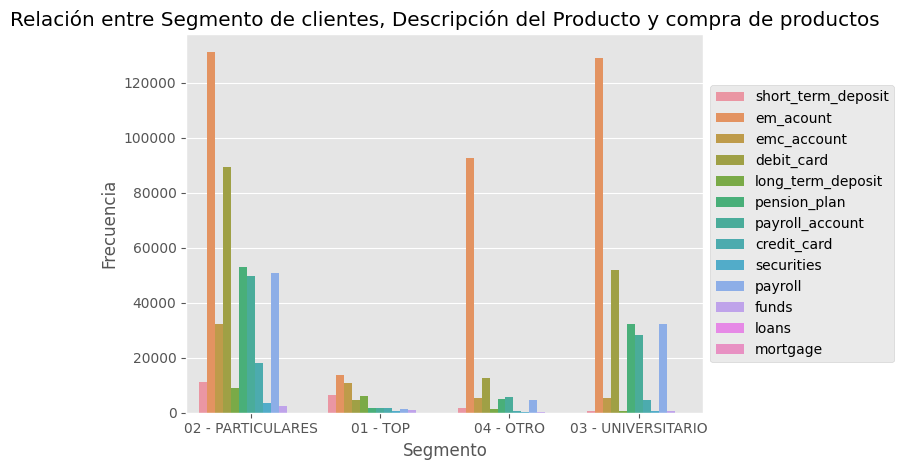

In [ ]:
# Graficar el gráfico de barras agrupadas
ax = sns.countplot(x='segment', hue='product_desc', data=df2, hue_order=df2['product_desc'].unique())

# Añadir etiquetas de eje y título
plt.xlabel('Segmento')
plt.ylabel('Frecuencia')
plt.title('Relación entre Segmento de clientes, Descripción del Producto y compra de productos')

# Ajustar el espacio entre las barras para una mejor legibilidad
plt.tight_layout()

# Mover la leyenda a una posición adecuada
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

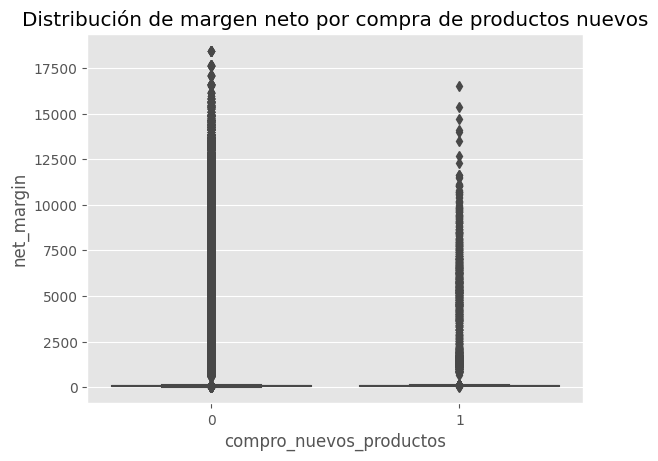

In [ ]:
sns.boxplot(x=TARGET_NV, y='net_margin', data=df2)
plt.title('Distribución de margen neto por compra de productos nuevos')
plt.show()

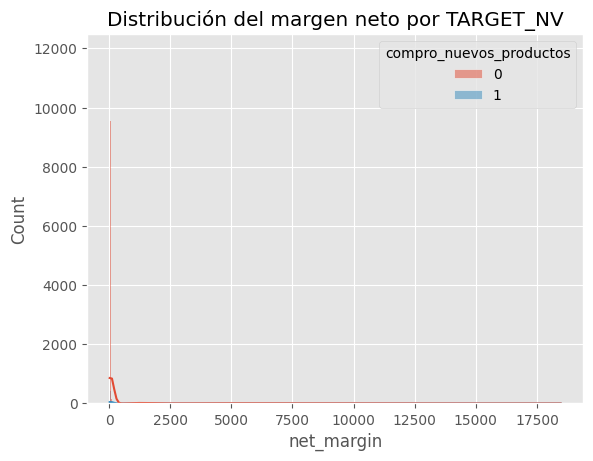

In [ ]:
sns.histplot(data=df2, x='net_margin', hue=TARGET_NV, kde=True)
plt.title('Distribución del margen neto por TARGET_NV')
plt.show()

# DATA PREPARATION

## ELIMINACIÓN DE COLUMNAS

In [ ]:
## Se eliminan todas las columnas que no son necesarias bien por haber sido transformadas previamente, o bien por su baja varianza

In [ ]:
df3 = df2.copy()

In [ ]:
print(df3.dtypes)

Unnamed: 0                          int64
pk_sale                             int64
pk_cid                              int64
month_sale                      period[M]
net_margin                        float64
product_desc                       object
family_product                     object
entry_date                 datetime64[ns]
entry_channel                      object
active_customer                   float64
segment                            object
country_id                         object
region_code                       float64
gender                             object
age                                 int64
deceased                           object
salary                            float64
short_term_deposit                  int64
loans                               int64
mortgage                            int64
funds                               int64
securities                          int64
long_term_deposit                   int64
credit_card                       

In [ ]:
#eliminación de columnas que no nos servirán para el modelo
df3 = df3.drop('region_code', axis=1)
df3 = df3.drop('deceased', axis=1)
df3= df3.drop('salary', axis=1)
df3= df3.drop('salary_LN', axis=1)
df3= df3.drop('payroll', axis=1)
df3= df3.drop('net_margin', axis=1)
df3= df3.drop('gender_num', axis=1)
df3= df3.drop('active_customer', axis=1)

## ONE HOT ENCODING

In [ ]:
print(df3.columns)

Index(['Unnamed: 0', 'pk_sale', 'pk_cid', 'month_sale', 'product_desc',
       'family_product', 'entry_date', 'entry_channel', 'segment',
       'country_id', 'gender', 'age', 'short_term_deposit', 'loans',
       'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount', 'entry_month', 'cliente_antiguo',
       'net_margin_log', 'Provincia', 'active_customer2', 'age_group',
       'salary_scaled', 'compro_nuevos_productos'],
      dtype='object')


In [ ]:
# Definir la función de One Hot Encoding
def one_hot_encode(df, columns):
    df_encoded = pd.get_dummies(df, columns=columns)
    return df_encoded

# Lista de columnas para codificar
columnas_codificar = ['product_desc', 'family_product', 'entry_channel', 'segment', 'country_id', 'gender', 'short_term_deposit', 'loans',
       'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount', 'cliente_antiguo','active_customer2','age_group','Provincia'] 

# Realizar la codificación one-hot en df2
df_encoded = one_hot_encode(df3, columnas_codificar)

In [ ]:
print(df_encoded.columns)

Index(['Unnamed: 0', 'pk_sale', 'pk_cid', 'month_sale', 'entry_date', 'age',
       'entry_month', 'net_margin_log', 'salary_scaled',
       'compro_nuevos_productos',
       ...
       'Provincia_Sevilla', 'Provincia_Soria', 'Provincia_Tarragona',
       'Provincia_Teruel', 'Provincia_Toledo', 'Provincia_Valencia',
       'Provincia_Valladolid', 'Provincia_Vizcaya', 'Provincia_Zamora',
       'Provincia_Zaragoza'],
      dtype='object', length=167)


In [ ]:
df_encoded.head(10)

,Unnamed: 0,pk_sale,pk_cid,month_sale,entry_date,age,entry_month,net_margin_log,salary_scaled,compro_nuevos_productos,...,Provincia_Sevilla,Provincia_Soria,Provincia_Tarragona,Provincia_Teruel,Provincia_Toledo,Provincia_Valencia,Provincia_Valladolid,Provincia_Vizcaya,Provincia_Zamora,Provincia_Zaragoza
0,0,6666,33620,2018-05,2018-04-01,50,2018-04,6.860559,0.004797,0,...,0,0,0,0,0,0,0,0,0,0
1,1,6666,33620,2018-05,2018-04-01,50,2018-04,6.860559,0.004797,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6666,33620,2018-05,2018-04-01,51,2018-04,6.860559,0.004797,0,...,0,0,0,0,0,0,0,0,0,0
3,3,130018,33620,2018-04,2018-04-01,50,2018-04,4.284965,0.004797,0,...,0,0,0,0,0,0,0,0,0,0
4,4,130018,33620,2018-04,2018-04-01,50,2018-04,4.284965,0.004797,0,...,0,0,0,0,0,0,0,0,0,0
5,5,130018,33620,2018-04,2018-04-01,51,2018-04,4.284965,0.004797,0,...,0,0,0,0,0,0,0,0,0,0
6,6,6667,35063,2018-06,2018-04-01,62,2018-04,7.394001,0.004344,0,...,0,0,0,0,0,0,0,0,0,0
7,7,6667,35063,2018-06,2018-04-01,62,2018-04,7.394001,0.004344,0,...,0,0,0,0,0,0,0,0,0,0
8,8,6667,35063,2018-06,2018-04-01,62,2018-04,7.394001,0.004344,0,...,0,0,0,0,0,0,0,0,0,0
9,9,130020,35063,2018-05,2018-04-01,62,2018-04,4.278054,0.004344,0,...,0,0,0,0,0,0,0,0,0,0


#MODELIZACIÓN

In [ ]:
df_modelo= df_encoded.copy()

In [ ]:
df_modelo

,Unnamed: 0,pk_sale,pk_cid,month_sale,entry_date,age,entry_month,net_margin_log,salary_scaled,compro_nuevos_productos,...,Provincia_Sevilla,Provincia_Soria,Provincia_Tarragona,Provincia_Teruel,Provincia_Toledo,Provincia_Valencia,Provincia_Valladolid,Provincia_Vizcaya,Provincia_Zamora,Provincia_Zaragoza
0,0,6666,33620,2018-05,2018-04-01,50,2018-04,6.860559,0.004797,0,...,0,0,0,0,0,0,0,0,0,0
1,1,6666,33620,2018-05,2018-04-01,50,2018-04,6.860559,0.004797,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6666,33620,2018-05,2018-04-01,51,2018-04,6.860559,0.004797,0,...,0,0,0,0,0,0,0,0,0,0
3,3,130018,33620,2018-04,2018-04-01,50,2018-04,4.284965,0.004797,0,...,0,0,0,0,0,0,0,0,0,0
4,4,130018,33620,2018-04,2018-04-01,50,2018-04,4.284965,0.004797,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915788,915788,247434,1553456,2019-05,2019-05-01,32,2019-05,4.055257,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
915789,915789,247435,1553541,2019-05,2019-05-01,54,2019-05,4.212128,0.000000,1,...,0,0,0,0,0,0,0,0,1,0
915790,915790,247436,1553559,2019-05,2019-05-01,43,2019-05,4.304065,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
915791,915791,247437,1553565,2019-05,2019-05-01,68,2019-05,4.422449,0.000000,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
pd.to_pickle(df_modelo,"/content/gdrive/MyDrive/a. Nuclio/entregas/easy_money/entrega 22 mayo 2023/df_modelo_pk")

In [ ]:
df_modelo1=pd.read_pickle("/content/gdrive/MyDrive/a. Nuclio/entregas/easy_money/entrega 22 mayo 2023/df_modelo_pk")

## MLC4.1: Train / Test Split

In [ ]:
## MLC4.1: Train / Test Split
df_modelo1['month_sale'].value_counts()

2018-10    94065
2018-09    85499
2018-07    80642
2018-08    77808
2018-11    68904
2018-02    67100
2018-12    60455
2018-03    51837
2018-06    50747
2019-01    45262
2018-04    44203
2019-02    42083
2018-05    41957
2019-03    40112
2019-04    33756
2019-05    31363
Freq: M, Name: month_sale, dtype: int64

In [ ]:
df_modelo1.pivot_table(index=['month_sale'], values='compro_nuevos_productos', aggfunc=[len, sum, np.mean])

,len,sum,mean
,compro_nuevos_productos,compro_nuevos_productos,compro_nuevos_productos
month_sale,,,
2018-02,67100,2844,0.042385
2018-03,51837,1952,0.037657
2018-04,44203,1461,0.033052
2018-05,41957,1388,0.033081
2018-06,50747,1774,0.034958
2018-07,80642,1434,0.017782
2018-08,77808,1781,0.022890
2018-09,85499,2000,0.023392


In [ ]:
# Obtener el valor de corte para el percentil 80
valor_corte = df_modelo1['month_sale'].quantile(0.8)

# Filtrar el DataFrame según el valor de corte
df_80porciento = df_modelo1[df_modelo1['month_sale'] <= valor_corte]

# Imprimir el DataFrame resultante
print(df_80porciento)


        Unnamed: 0  pk_sale   pk_cid month_sale entry_date  age entry_month  \
0                0     6666    33620    2018-05 2018-04-01   50     2018-04   
1                1     6666    33620    2018-05 2018-04-01   50     2018-04   
2                2     6666    33620    2018-05 2018-04-01   51     2018-04   
3                3   130018    33620    2018-04 2018-04-01   50     2018-04   
4                4   130018    33620    2018-04 2018-04-01   50     2018-04   
...            ...      ...      ...        ...        ...  ...         ...   
899637      899637   236604  1528354    2019-01 2019-01-01   35     2019-01   
899638      899638   236604  1528354    2019-01 2019-01-01   35     2019-01   
899730      899730   236662  1528452    2019-01 2019-01-01   27     2019-01   
899731      899731   236662  1528452    2019-01 2019-01-01   27     2019-01   
899732      899732   236662  1528452    2019-01 2019-01-01   28     2019-01   

        net_margin_log  salary_scaled  compro_nuevo

In [ ]:
df_80porciento.tail()

,Unnamed: 0,pk_sale,pk_cid,month_sale,entry_date,age,entry_month,net_margin_log,salary_scaled,compro_nuevos_productos,...,Provincia_Sevilla,Provincia_Soria,Provincia_Tarragona,Provincia_Teruel,Provincia_Toledo,Provincia_Valencia,Provincia_Valladolid,Provincia_Vizcaya,Provincia_Zamora,Provincia_Zaragoza
899637,899637,236604,1528354,2019-01,2019-01-01,35,2019-01,4.043051,0.0,0,...,0,0,0,0,0,0,0,0,0,0
899638,899638,236604,1528354,2019-01,2019-01-01,35,2019-01,4.043051,0.0,0,...,0,0,0,0,0,0,0,0,0,0
899730,899730,236662,1528452,2019-01,2019-01-01,27,2019-01,4.293195,0.0,0,...,0,0,0,0,0,0,0,0,0,0
899731,899731,236662,1528452,2019-01,2019-01-01,27,2019-01,4.293195,0.0,0,...,0,0,0,0,0,0,0,0,0,0
899732,899732,236662,1528452,2019-01,2019-01-01,28,2019-01,4.293195,0.0,0,...,0,0,0,0,0,0,0,0,0,0


Identificamos que aproximadamente el 80% cae sobre el 2019-01. Se toma la decisión de hacer en entrenamiento con valores del 2018 y la validación con valores de 2019.

Transformamos las dos últimas variables que nos faltan a números, que son las fechas tanto de entrada como mes de venta. 

In [ ]:
df_modelo1['año_entrada'] = df_modelo1['entry_month'].dt.year
df_modelo1['mes_entrada'] = df_modelo1['entry_month'].dt.month

In [ ]:
df_modelo1['año_venta'] = df_modelo1['month_sale'].dt.year
df_modelo1['mes_venta'] = df_modelo1['month_sale'].dt.month

In [ ]:
df_modelo1['mes_venta']

0         5
1         5
2         5
3         4
4         4
         ..
915788    5
915789    5
915790    5
915791    5
915792    5
Name: mes_venta, Length: 915793, dtype: int64

In [ ]:
df_modelo1 = df_modelo1.drop(['entry_month', 'month_sale', 'entry_date'], axis=1)

In [ ]:
df_modelo1 = df_modelo1.drop(['pk_sale', 'pk_cid'],axis=1) #Viendo en el primer decision tree, estas variables cuando son seleccionadas no aportan aprendizaje
# Se hace la prueba para corroborar esto.

In [ ]:
print(df_modelo1.columns)

Index(['Unnamed: 0', 'age', 'net_margin_log', 'salary_scaled',
       'compro_nuevos_productos', 'product_desc_credit_card',
       'product_desc_debit_card', 'product_desc_em_acount',
       'product_desc_emc_account', 'product_desc_funds',
       ...
       'Provincia_Toledo', 'Provincia_Valencia', 'Provincia_Valladolid',
       'Provincia_Vizcaya', 'Provincia_Zamora', 'Provincia_Zaragoza',
       'año_entrada', 'mes_entrada', 'año_venta', 'mes_venta'],
      dtype='object', length=166)


In [ ]:
target_linked_features = ['compro_nuevos_productos'] #Seleccionamos las columnas que hicimos durante el dataunderstanding

In [ ]:
df_val = df_modelo1[df_modelo1['año_venta'] == 2019]
df_dev = df_modelo1[df_modelo1['año_venta'] < 2019]

In [ ]:
df_dev.shape

(723217, 166)

In [ ]:
df_val.shape

(192576, 166)

In [ ]:
df_val.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192576 entries, 91 to 915792
Columns: 166 entries, Unnamed: 0 to mes_venta
dtypes: float64(2), int64(7), uint8(157)
memory usage: 43.5 MB


In [ ]:
df_dev.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723217 entries, 0 to 893498
Columns: 166 entries, Unnamed: 0 to mes_venta
dtypes: float64(2), int64(7), uint8(157)
memory usage: 163.5 MB


In [ ]:
df_dev_X = df_dev.drop(df_dev[target_linked_features], axis=1)
df_dev_y = df_dev.loc[:, target_linked_features]

In [ ]:
df_val_X = df_val.drop(df_val[target_linked_features], axis=1)
df_val_y = df_val.loc[:, target_linked_features]

In [ ]:
df_dev_X.head().T

,0,1,2,3,4
Unnamed: 0,0.000000,1.000000,2.000000,3.000000,4.000000
age,50.000000,50.000000,51.000000,50.000000,50.000000
net_margin_log,6.860559,6.860559,6.860559,4.284965,4.284965
salary_scaled,0.004797,0.004797,0.004797,0.004797,0.004797
product_desc_credit_card,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
Provincia_Zaragoza,0.000000,0.000000,0.000000,0.000000,0.000000
año_entrada,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mes_entrada,4.000000,4.000000,4.000000,4.000000,4.000000
año_venta,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000


In [ ]:
df_dev_y.head().T

,0,1,2,3,4
compro_nuevos_productos,0,0,0,0,0


##Random Holdout

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        df_dev_X, # X 
                                        df_dev_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
)

In [ ]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506251 entries, 428611 to 141179
Columns: 165 entries, Unnamed: 0 to mes_venta
dtypes: float64(2), int64(6), uint8(157)
memory usage: 110.6 MB


In [ ]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216966 entries, 71949 to 125798
Columns: 165 entries, Unnamed: 0 to mes_venta
dtypes: float64(2), int64(6), uint8(157)
memory usage: 47.4 MB


In [ ]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506251.0,453158.214856,269830.496939,0.000000,214473.000000,441319.000000,708310.500000,893497.000000
age,506251.0,34.026736,13.349730,2.000000,23.000000,31.000000,41.000000,102.000000
net_margin_log,506251.0,4.816949,1.439576,3.258097,4.135167,4.255613,4.400603,9.823762
salary_scaled,506251.0,0.002736,0.006663,0.000000,0.000000,0.002202,0.003782,1.000000
product_desc_credit_card,506251.0,0.027352,0.163107,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,216966.0,453444.101500,269333.139389,2.000000,215906.250000,443214.000000,707836.750000,893498.000000
age,216966.0,34.018938,13.363259,2.000000,23.000000,31.000000,41.000000,102.000000
net_margin_log,216966.0,4.812399,1.435047,3.258097,4.136765,4.255613,4.399375,9.823762
salary_scaled,216966.0,0.002748,0.006531,0.000000,0.000000,0.002214,0.003788,1.000000
product_desc_credit_card,216966.0,0.026765,0.161395,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
compro_nuevos_productos,506251.0,0.031376,0.174331,0.0,0.0,0.0,0.0,1.0


In [ ]:
y_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
compro_nuevos_productos,216966.0,0.030908,0.173069,0.0,0.0,0.0,0.0,1.0


## Model definition

Import scikits

In [ ]:
!conda install python-graphviz -y

/bin/bash: conda: command not found


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

##Decision Tree

In [ ]:
#DecisionTreeClassifier?

In [ ]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=4, # Importante, regulará el sobreajuste
                        # min_samples_split=2,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,  
                )

In [ ]:
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
#export_graphviz?


In [ ]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        out_file=None,
                        # max_depth=None,
                        feature_names=X_test.columns,
                        class_names=['No Compra', 'Compra'],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

In [ ]:
import pydotplus
graph2 = pydotplus.graph_from_dot_data(dot_data)  

In [ ]:
graph2.write_png("tree.png")

True

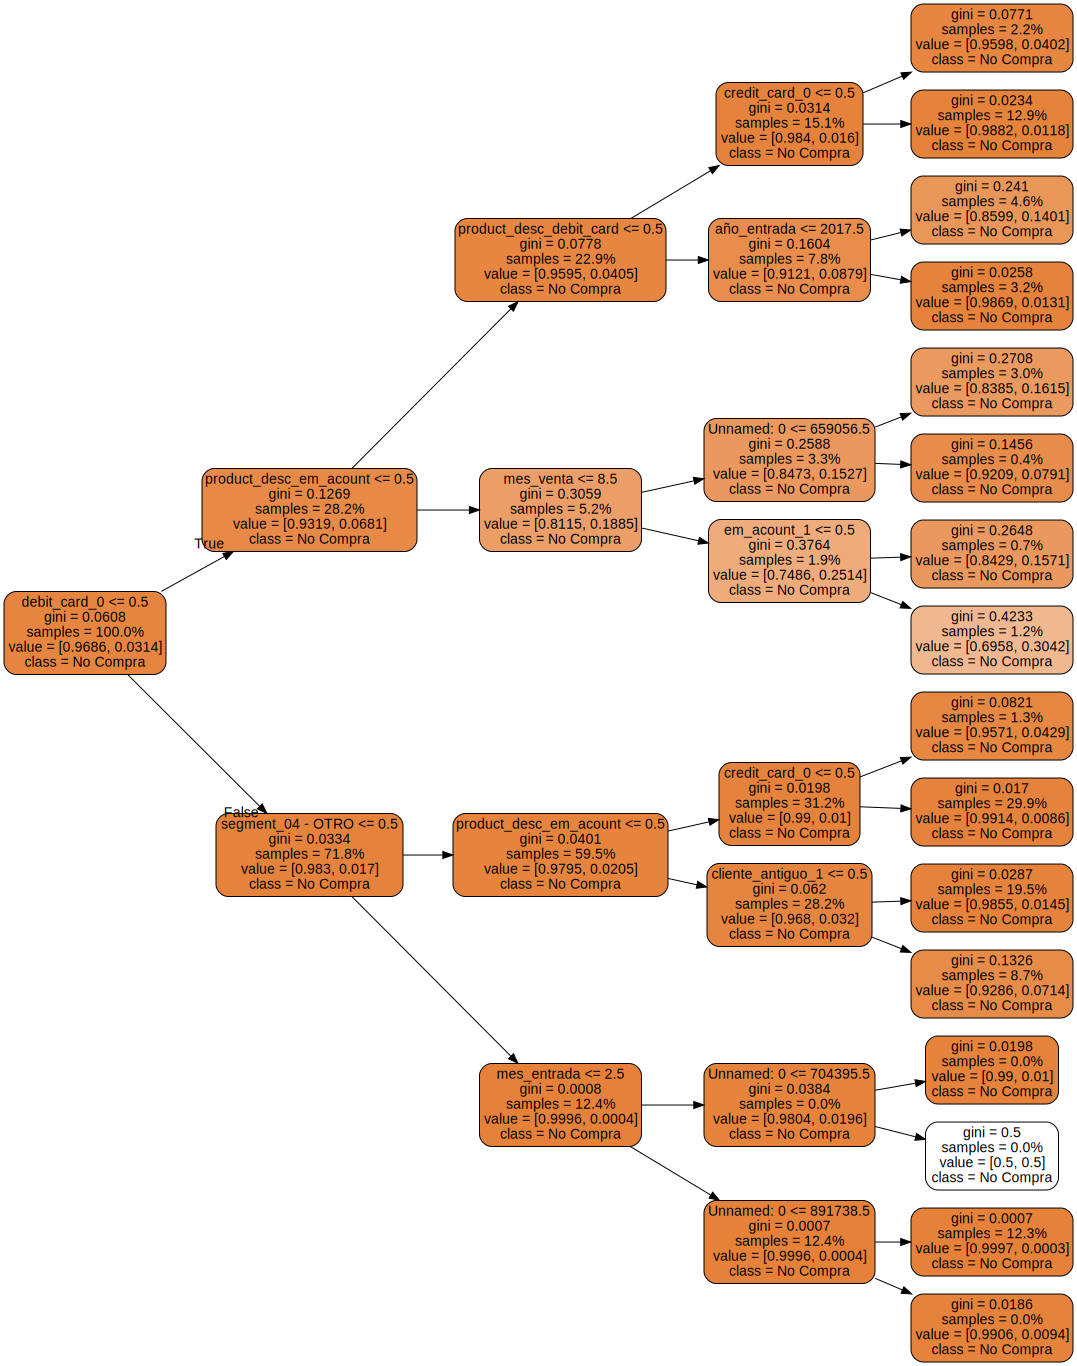

In [ ]:
graphviz.Source(dot_data, format = 'png')

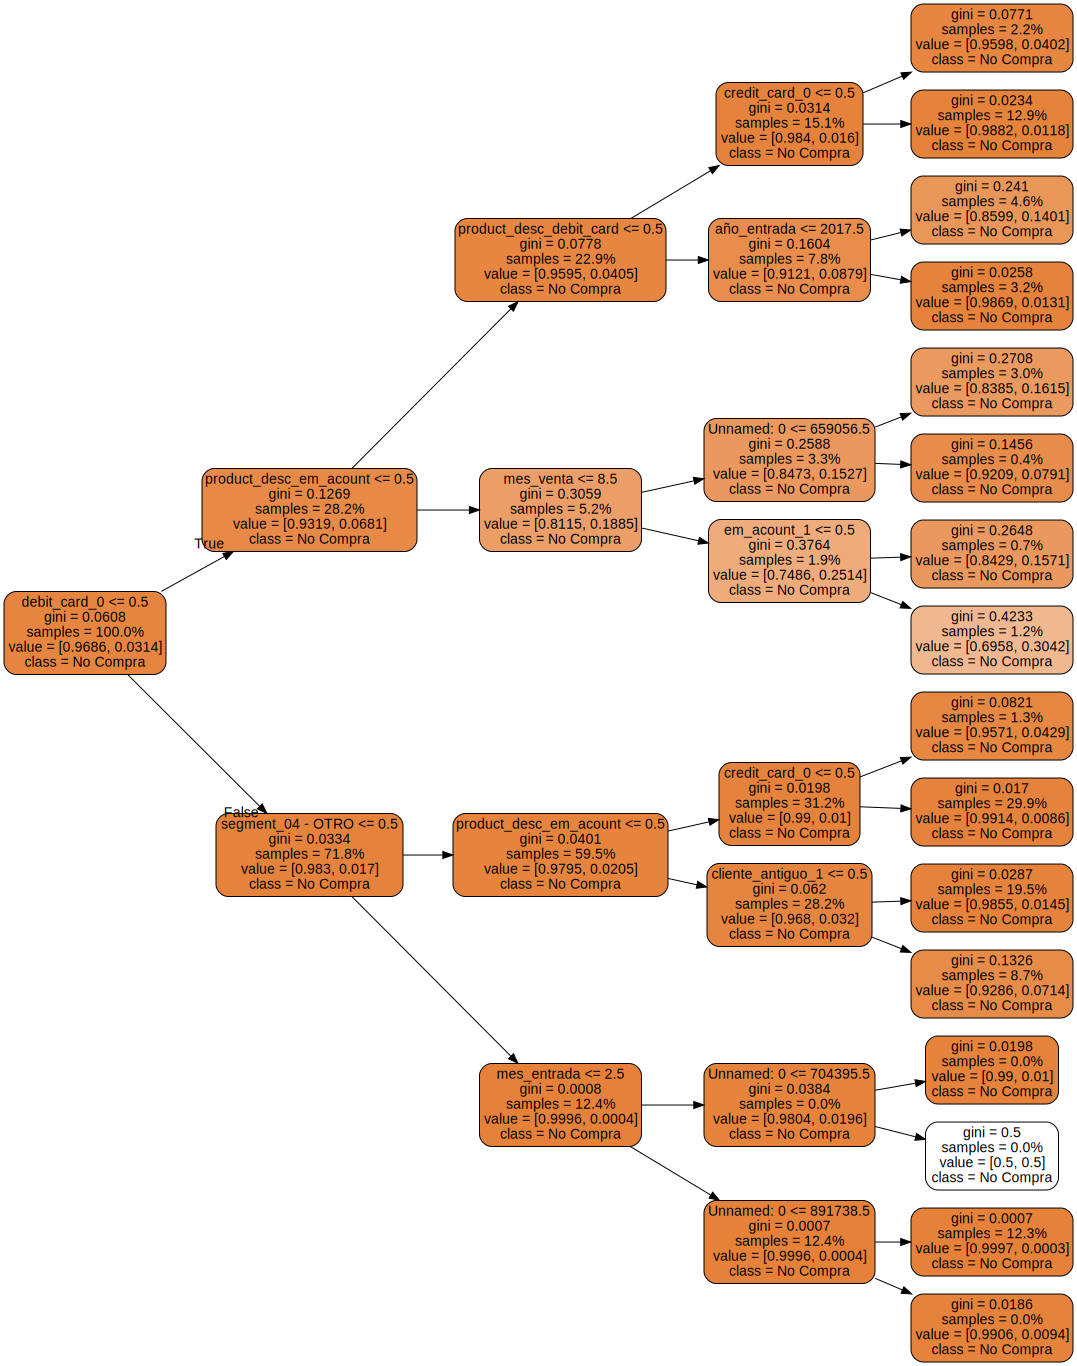

In [ ]:
graph = graphviz.Source(dot_data)
graph

No vemos que haya aprendido ni nos da una visión de las variables más importantes. Se procede a utilizar un random forest

## Model evaluation

In [ ]:
dt.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['Compro_nuevos_prod_Prediction'])

In [ ]:
y_test_pred

,Compro_nuevos_prod_Prediction
71949,0
221180,0
685942,0
630583,0
296833,0
...,...
603105,0
891710,0
574307,0
315911,0


### Se compara predicción con training

In [ ]:
df_results = y_test.join(y_test_pred, how= 'inner')

In [ ]:
df_results.head(10)

,compro_nuevos_productos,Compro_nuevos_prod_Prediction
71949,0,0
221180,0,0
685942,0,0
630583,0,0
296833,0,0
694103,0,0
884486,0,0
606155,1,0
827086,0,0
595962,0,0


In [ ]:
df_results['Success'] = (df_results['compro_nuevos_productos'] == df_results['Compro_nuevos_prod_Prediction']).astype(int)

In [ ]:
df_results['Success'].count()

216966

In [ ]:
porcentaje_de_acierto = df_results['Success'].sum()*0.100/100 

In [ ]:
porcentaje_de_acierto

210.26

In [ ]:
df_results['Success'].mean()

0.969091931454698

In [ ]:
confusion_matrix = pd.crosstab(df_results['compro_nuevos_productos'],df_results['Compro_nuevos_prod_Prediction'])

In [ ]:
confusion_matrix

Compro_nuevos_prod_Prediction,0
compro_nuevos_productos,
0,210260
1,6706


In [ ]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

IndexError: ignored

In [ ]:
(TP+TN)/(TP+TN+FP+FN)

#CONCLUSIÓN

Este es el primer modelo realizado con la muestra sin modificar nuestra variable target, que al estar muy desbalanceada, genera un modelo que con un 96% de probabilidad de éxito dice que nadie compra. 

Se realizarán dos modelos en diferentes notebooks haciendo un undersampling y oversampling de nuestra variable target: compran productos nuevos. 